# MBTI Project EDA

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re
from scipy import stats
from tqdm import tqdm

%matplotlib inline
sns.set(rc={'axes.facecolor':'white'})

In [3]:
df = pd.read_csv('../../data/mbti_interim', index_col=0)

### Let's start by checking the state of our dataset after data-wrangling

In [4]:
df.describe().T

count         mean          std    min      25%  \
I                    8675.0     0.769568     0.421134   0.00     1.00   
J                    8675.0     0.395850     0.489061   0.00     0.00   
N                    8675.0     0.862017     0.344902   0.00     1.00   
T                    8675.0     0.458905     0.498337   0.00     0.00   
posts_len            8675.0  7234.989625  1607.806938  57.00  6325.00   
count_posts          8675.0    48.742939     5.475907   1.00    50.00   
avg_num_char_x_post  8675.0   145.464641    28.868145  23.76   127.73   
num_of_links         8675.0     3.304438     5.792856   0.00     0.00   
INFJ_mentions        8675.0     1.780403     3.180249   0.00     0.00   
ENTP_mentions        8675.0     1.094524     2.502673   0.00     0.00   
INTP_mentions        8675.0     1.528415     2.822138   0.00     0.00   
INTJ_mentions        8675.0     1.733141     3.030420   0.00     0.00   
ENTJ_mentions        8675.0     0.601499     1.691145   0.00     0.00   
ENFJ_mentions        8675.0     0.599193     1.738608   0.00     0.00   
INFP_mentions        8675.0     1.983055     3.238974   0.00     0.00   
ENFP_mentions        8675.0     1.257406     2.615385   0.00     0.00   
ISFP_mentions        8675.0     0.557810     1.591414   0.00     0.00   
ISTP_mentions        8675.0     0.620865     1.848980   0.00     0.00   
ISFJ_mentions        8675.0     0.530375     1.559472   0.00     0.00   
ISTJ_mentions        8675.0     0.646455     1.766868   0.00     0.00   
ESTP_mentions        8675.0     0.439539     1.413359   0.00     0.00   
ESFP_mentions        8675.0     0.376254     1.090758   0.00     0.00   
ESTJ_mentions        8675.0     0.337637     1.056839   0.00     0.00   
ESFJ_mentions        8675.0     0.432392     1.550662   0.00     0.00   
Total_Mentions       8675.0    14.518963    13.093647   0.00     5.00   
:D_count             8675.0     0.449568     1.628115   0.00     0.00   
;D_count             8675.0     0.030893     0.266862   0.00     0.00   
:)_count             8675.0     1.310086     2.720045   0.00     0.00   
;)_count             8675.0     0.263516     0.890060   0.00     0.00   
:(_count             8675.0     0.152161     0.503750   0.00     0.00   
xD_count             8675.0     0.159424     0.870740   0.00     0.00   
XD_count             8675.0     0.178559     0.894119   0.00     0.00   
Total_Emojis         8675.0     2.544207     4.386501   0.00     0.00   

                         50%          75%           max  
I                       1.00     1.000000      1.000000  
J                       0.00     1.000000      1.000000  
N                       1.00     1.000000      1.000000  
T                       0.00     1.000000      1.000000  
posts_len            7515.00  8429.000000  10090.000000  
count_posts            50.00    50.000000     89.000000  
avg_num_char_x_post   149.66   167.161429    199.285714  
num_of_links            1.00     4.000000     91.000000  
INFJ_mentions           0.00     2.000000     34.000000  
ENTP_mentions           0.00     1.000000     30.000000  
INTP_mentions           0.00     2.000000     29.000000  
INTJ_mentions           0.00     2.000000     28.000000  
ENTJ_mentions           0.00     0.000000     34.000000  
ENFJ_mentions           0.00     0.000000     37.000000  
INFP_mentions           1.00     3.000000     33.000000  
ENFP_mentions           0.00     1.000000     51.000000  
ISFP_mentions           0.00     0.000000     26.000000  
ISTP_mentions           0.00     0.000000     41.000000  
ISFJ_mentions           0.00     0.000000     27.000000  
ISTJ_mentions           0.00     1.000000     30.000000  
ESTP_mentions           0.00     0.000000     32.000000  
ESFP_mentions           0.00     0.000000     26.000000  
ESTJ_mentions           0.00     0.000000     18.000000  
ESFJ_mentions           0.00     0.000000     42.000000  
Total_Mentions         11.00    20.000000    134.000000  
:D_count                0.00   

In [5]:
df.head()

type                                              posts  I  J  N  T     NF  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...  1  1  1  0   True   
1  ENTP  'I'm finding the lack of me in these posts ver...  0  0  1  1  False   
2  INTP  'Good one  _____   https://www.youtube.com/wat...  1  0  1  1  False   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...  1  1  1  1  False   
4  ENTJ  'You're fired.|||That's another silly misconce...  0  1  1  1  False   

      NT     SP     SJ  ...  Total_Mentions :D_count  ;D_count  :)_count  \
0  False  False  False  ...               8        0         0         0   
1   True  False  False  ...              19        9         3         5   
2   True  False  False  ...               4        2         0         7   
3   True  False  False  ...              12        0         0         0   
4   True  False  False  ...               5        0         0         0   

   ;)_count  :(_count  xD_count  XD_count  Total_Emojis  \
0         0         0         0         0             0   
1         0         0         0         0            17   
2         0         0         0         0             9   
3         0         0         0         0             0   
4         1         0         0         1             2   

                                         posts_clean  
0  [['enfp', 'intj', 'moment', 'sportscenter', 't...  
1  [['im', 'finding', 'lack', 'post', 'alarming']...  
2  [['good', 'one'], ['course', 'say', 'know', 't...  
3  [['dear', 'intp', 'enjoyed', 'conversation', '...  
4  [['youre', 'fired'], ['thats', 'another', 'sil...  

[5 rows x 41 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 8674
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 8675 non-null   object 
 1   posts                8675 non-null   object 
 2   I                    8675 non-null   int64  
 3   J                    8675 non-null   int64  
 4   N                    8675 non-null   int64  
 5   T                    8675 non-null   int64  
 6   NF                   8675 non-null   bool   
 7   NT                   8675 non-null   bool   
 8   SP                   8675 non-null   bool   
 9   SJ                   8675 non-null   bool   
 10  posts_len            8675 non-null   int64  
 11  posts_separated      8675 non-null   object 
 12  count_posts          8675 non-null   int64  
 13  avg_num_char_x_post  8675 non-null   float64
 14  num_of_links         8675 non-null   int64  
 15  INFJ_mentions        8675 non-null   i

<br>

**We can make some adjustments to this dataset by converting the keirsey temperaments from booleans to 1s and 0s**

In [8]:
keirsey = ['NF','NT','SP','SJ']
for i in keirsey:
    df[i] = df[i].astype(int)

<br>

**For the time being we will drop the "text" columns**

In [9]:
df_text = df[['type','posts','posts_separated','posts_clean']]

In [10]:
df_text.head() # 

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                     posts_separated  \
0  ["'http://www.youtube.com/watch?v=qsXHcwe3krw"...   
1  ["'I'm finding the lack of me in these posts v...   
2  ["'Good one  _____   https://www.youtube.com/w...   
3  ["'Dear INTP,   I enjoyed our conversation the...   
4  ["'You're fired.", "That's another silly misco...   

                                         posts_clean  
0  [['enfp', 'intj', 'moment', 'sportscenter', 't...  
1  [['im', 'finding', 'lack', 'post', 'alarming']...  
2  [['good', 'one'], ['course', 'say', 'know', 't...  
3  [['dear', 'intp', 'enjoyed', 'conversation', '...  
4  [['youre', 'fired'], ['thats', 'another', 'sil...

In [11]:
df.drop(['posts','posts_separated','posts_clean'], axis=1, inplace= True)

In [12]:
df.head()

type  I  J  N  T  NF  NT  SP  SJ  posts_len  ...  ESFJ_mentions  \
0  INFJ  1  1  1  0   1   0   0   0       4652  ...              0   
1  ENTP  0  0  1  1   0   1   0   0       7053  ...              0   
2  INTP  1  0  1  1   0   1   0   0       5265  ...              0   
3  INTJ  1  1  1  1   0   1   0   0       6271  ...              3   
4  ENTJ  0  1  1  1   0   1   0   0       6111  ...              0   

   Total_Mentions  :D_count  ;D_count  :)_count  ;)_count  :(_count  xD_count  \
0               8         0         0         0         0         0         0   
1              19         9         3         5         0         0         0   
2               4         2         0         7         0         0         0   
3              12         0         0         0         0         0         0   
4               5         0         0         0         1         0         0   

   XD_count  Total_Emojis  
0         0             0  
1         0            17  
2         0             9  
3         0             0  
4         1             2  

[5 rows x 38 columns]

### Column Renaming and new features

In [13]:
mention_columns = df.iloc[:,13:29].columns.values

In [14]:
new_columns = dict(zip(mention_columns, [re.sub(r'_.*$','',x) for x in mention_columns]))

In [15]:
df=df.rename(columns = new_columns)

In [16]:
mentions_others = []
for e,i in enumerate(df['type']):
    result = df.drop(i, axis=1).iloc[e,13:28].sum()
    mentions_others.append(result) 

In [17]:
df.insert(loc=30, column='mentions_others', value=mentions_others)

In [18]:
df.insert(loc=31, column='self_mentions', value=(df['Total_Mentions']-df['mentions_others'])) 

In [19]:
keirsey = []

for i in df['type']:
    if re.search(r'.NF.',i):
        keirsey.append('NF')

    elif re.search(r'.NT.',i):
        keirsey.append('NT')

    elif re.search(r'.S.P',i):
        keirsey.append('SP')

    else:
        keirsey.append('SJ')


In [20]:
df['keirsey'] = keirsey

In [21]:
# Let's check to see if our code worked well
df.iloc[:,29:32].head()

Total_Mentions  mentions_others  self_mentions
0               8                6              2
1              19                9             10
2               4                3              1
3              12               10              2
4               5                1              4

In [22]:
# We create this variable that we will use quite a lot
mbti_types = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

### Colors

I create lists of HEX, RGB, and % RGB colors to keep a homogeneous look across visualizations

In [23]:
colors_types = {'INFP':'#AD3139','INFJ':'#C64D43','INTP':'#D66C54','INTJ':'#E28C64','ENTP':'#E9AB72','ENFP':'#EEC58A','ISTP' : '#F2DDA3','ISFP' : '#F5EEBA','ENTJ' : '#F2F6D4','ISTJ' : '#E6F2F0','ENFJ' : '#CCE4EC','ISFJ' : '#B0D3DF','ESTP' : '#91BACF','ESFP' : '#769EBE','ESFJ' : '#5C80AC','ESTJ' : '#4A619A'}
colors_main = {'I':'#a50026','E':'#d73027','S':'#f46d43','N':'#fdae61','T':'#fee090','F':'#ffffbf','P':'#e0f3f8','J':'#abd9e9'}
colors_keirsey = {'NF':'#a50026', 'NT':'#fdae61' ,'SP':'#abd9e9', 'SJ':'#313695'}

In [24]:
def hex_rgb_converter(dictionary, dictionary_name):
    dictionary_name = {}
    for k, v in dictionary.items():
        v = v.lstrip('#')  
        result = tuple(int(v[i:i+2], 16) for i in (0, 2, 4))
        dictionary_name[k] = result
    return dictionary_name

In [25]:
colors_main_rgb = hex_rgb_converter(colors_main, 'colors_main_rgb')
colors_types_rgb = hex_rgb_converter(colors_types, 'colors_type_rgb')
colors_keirsey_rgb = hex_rgb_converter(colors_keirsey, 'colors_keirsey_rgb')

In [26]:
def rgb_pct_converter(dictionary, dictionary_name):
        dictionary_name = {}
        for k, v in dictionary.items():
            result = [x/255 for x in v]
            result.append(1.0)
            dictionary_name[k] = result
        return dictionary_name

In [27]:
colors_main_rgb_pct = rgb_pct_converter(colors_main_rgb, 'colors_main_rgb_pct')
colors_types_rgb_pct = rgb_pct_converter(colors_types_rgb, 'colors_types_rgb_pct')
colors_keirsey_rgb_pct = rgb_pct_converter(colors_keirsey_rgb, 'colors_keirsey_rgb_pct')

<br>

### First visualizations

**Categorical Data**

In [28]:
df_cat = df.select_dtypes(include='object').copy()
df_cat.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

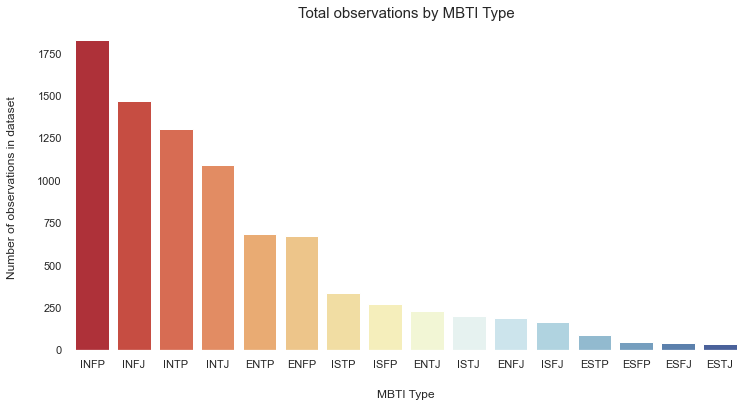

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=df_cat, order= df_cat['type'].value_counts().index, palette='RdYlBu')
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.title('Total observations by MBTI Type', size=15)
plt.savefig('Figures/countplot_types.png', dpi=300)

<br>

**We can see that there are quite a lot more cases of Intuition (N) than Sensing (S) and in the first category, Introversion (I) has more cases than Extraversion (E). Let's compare these numbers with an estimate of the global population according to the website 16Personalities**

In [30]:
# Let's first save the order of the previous visualization to avoid mismatching mbti types
sorter = df_cat['type'].value_counts().index.to_list()

In [31]:
# We import the dataset
df_global = pd.read_csv('../../data/16personalities.csv')

In [32]:
# Let's check how it looks like
df_global.head()

code  percentage
0  enfj    0.074567
1  enfp    0.144600
2  entj    0.024050
3  entp    0.044300
4  esfj    0.090000

In [33]:
# We convert the code (which is the MBTI type) to uppercase letters
df_global['code'] = df_global['code'].apply(lambda x:x.upper())

In [34]:
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter,range(len(sorter))))

# Generate a rank column that will be used to sort the dataframe numerically
df_global['Rank'] = df_global['code'].map(sorterIndex)

# Sort the dataframe
df_global.sort_values('Rank', ascending = True, inplace = True)

In [35]:
# We can look at the new dataframe with the ranking column
df_global

code  percentage  Rank
9   INFP    0.156667     0
8   INFJ    0.079200     1
11  INTP    0.055067     2
10  INTJ    0.031433     3
3   ENTP    0.044300     4
1   ENFP    0.144600     5
15  ISTP    0.020900     6
13  ISFP    0.054967     7
2   ENTJ    0.024050     8
14  ISTJ    0.031450     9
0   ENFJ    0.074567    10
12  ISFJ    0.079250    11
7   ESTP    0.021217    12
5   ESFP    0.052683    13
4   ESFJ    0.090000    14
6   ESTJ    0.034917    15

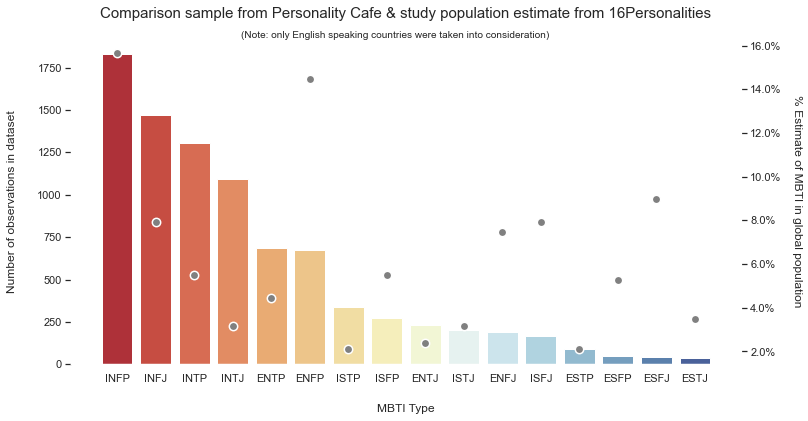

In [36]:
fig, ax = plt.subplots(figsize=(12,6))

# Countplot
sns.countplot(x='type', data=df_cat, order= df_cat['type'].value_counts().index, palette='RdYlBu', ax=ax)
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel('MBTI Type',labelpad=20)

# Scatterplot Data
x = df_global['code'].to_list()
y = np.array(df_global['percentage']*100)

# Scatterplot
ax2 = ax.twinx()
sns.scatterplot(x, y, ax=ax2,  s=70, facecolors='grey', edgecolors='b', linewidth=1.5)
ax2.set_xticklabels(x)
ax2.grid(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel('% Estimate of MBTI in global population', rotation=270, labelpad=20)

plt.title('Comparison sample from Personality Cafe & study population estimate from 16Personalities',size=15,pad=20)
plt.figtext(.5,.88,'(Note: only English speaking countries were taken into consideration)',fontsize=10,ha='center')
plt.savefig('Figures/countplot_types_comparison_population.png', dpi=300)

plt.show()

<br>

**We can see there is quite a big difference between our data an the target population... this is something to consider later on**

**16 types are a lot, let's do the same for Keirsey's Temperaments and for the individual attributes**

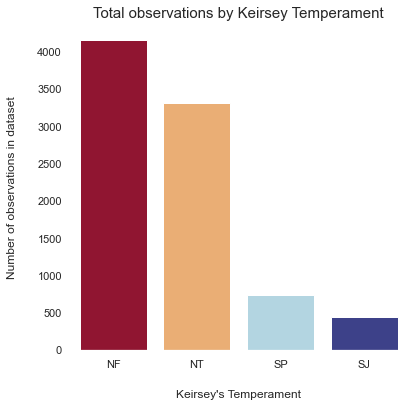

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='keirsey', data=df_cat, order= df_cat['keirsey'].value_counts().index, palette=colors_keirsey.values())
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel("Keirsey's Temperament",labelpad=20)
plt.title('Total observations by Keirsey Temperament', size=15)
plt.savefig('Figures/countplot_keirsey.png', dpi=300)

In [38]:
global_keirsey = []

for i in df_global['code']:
    if re.search(r'.NF.',i):
        global_keirsey.append('NF')

    elif re.search(r'.NT.',i):
        global_keirsey.append('NT')

    elif re.search(r'.S.P',i):
        global_keirsey.append('SP')

    else:
        global_keirsey.append('SJ')

In [39]:
df_global['keirsey'] = global_keirsey

In [40]:
df_global_keirsey = df_global.groupby('keirsey').sum()

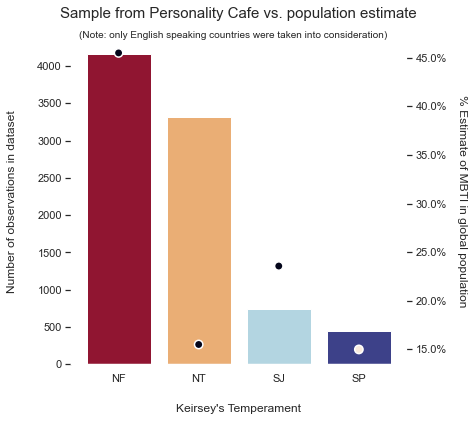

In [41]:
fig, ax = plt.subplots(figsize=(6,6))

# Countplot
sns.countplot(x='keirsey', data=df_cat, order= df_cat['keirsey'].value_counts().index, palette=colors_keirsey.values())
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel("Keirsey's Temperament",labelpad=20)

# Scatterplot Data
x = df_global_keirsey.index.to_list()
y = np.array(df_global_keirsey['percentage']*100)

# Scatterplot
ax2 = ax.twinx()
sns.scatterplot(x, y, ax=ax2,  s=70, facecolors='grey', edgecolors='b', linewidth=1.5)
ax2.set_xticklabels(x)
ax2.grid(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel('% Estimate of MBTI in global population', rotation=270, labelpad=20)

plt.title('Sample from Personality Cafe vs. population estimate',size=15,pad=20)
plt.figtext(.5,.88,'(Note: only English speaking countries were taken into consideration)',fontsize=10,ha='center')
plt.savefig('Figures/countplot_keirsey_comparison_population.png', dpi=300)

plt.show()

In [102]:
pc_data = {'NF':{'comments':1.9, 'views':222},
 'NT':{'comments':1.5, 'views':172},
'SJ':{'comments':0.228, 'views':38.6},
'SP':{'comments':0.303, 'views':49.3}}

In [106]:
pc_data = pd.DataFrame(pc_data).T

In [184]:
comments = pc_data['comments'].apply(lambda x: x/pc_data.sum()[0])
views = pc_data['views'].apply(lambda x: x/pc_data.sum()[1])

In [190]:
views.values

array([0.46067649, 0.35692052, 0.08009961, 0.10230338])

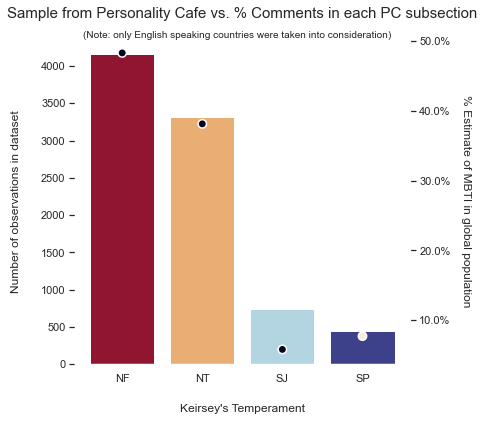

In [198]:
fig, ax = plt.subplots(figsize=(6,6))

# Countplot
sns.countplot(x='keirsey', data=df_cat, order= df_cat['keirsey'].value_counts().index, palette=colors_keirsey.values())
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel("Keirsey's Temperament",labelpad=20)

# Scatterplot Data
x1 = comments.index
y1 = comments.values*100

# Scatterplot
ax2 = ax.twinx()
sns.scatterplot(x1, y1, ax=ax2,  s=70, facecolors='grey', edgecolors='b', linewidth=1.5)
ax2.set_xticklabels(x)
ax2.grid(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel('% Estimate of MBTI in global population', rotation=270, labelpad=20)

plt.title('Sample from Personality Cafe vs. % Comments in each PC subsection',size=15,pad=20)
plt.figtext(.5,.88,'(Note: only English speaking countries were taken into consideration)',fontsize=10,ha='center')
plt.savefig('Figures/countplot_keirsey_comparison_personality_cafe_comments.png', dpi=300)

plt.show()

<br>

**Individual Attributes**

In [42]:
barplots_data = df.iloc[:,1:5].mean()

In [43]:
barplots_data

I    0.769568
J    0.395850
N    0.862017
T    0.458905
dtype: float64

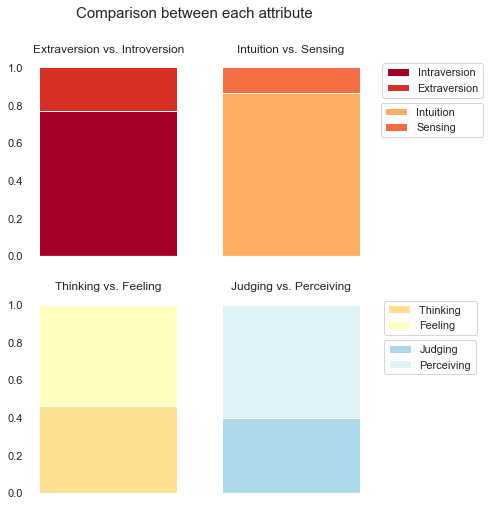

In [44]:
fig, ax = plt.subplots(2,2, figsize=(6,8))

ax[0,0].bar(0, height=barplots_data[0], color=colors_main['I'], edgecolor='white', width=0.4, label="Intraversion")
ax[0,0].bar(0, height=(1-barplots_data[0]), bottom=barplots_data[0], color=colors_main['E'], edgecolor='white', width=0.4, label="Extraversion")
ax[0,0].set_title('Extraversion vs. Introversion')
ax[0,0].legend(loc='best', bbox_to_anchor=(3,1), ncol=1)

ax[0,1].bar(0, height=barplots_data[2], color=colors_main['N'], edgecolor='white', width=0.4, label="Intuition        ")
ax[0,1].bar(0, height=(1-barplots_data[2]), bottom=barplots_data[2], color=colors_main['S'], edgecolor='white', width=0.4, label="Sensing")
ax[0,1].set_title('Intuition vs. Sensing')
ax[0,1].legend(loc='best', bbox_to_anchor=(1.80,0.8), ncol=1)

ax[1,0].bar(0, height=barplots_data[3], color=colors_main['T'], edgecolor='white', width=0.4, label="Thinking    ")
ax[1,0].bar(0, height=(1-barplots_data[3]), bottom=barplots_data[3], color=colors_main['F'], edgecolor='white', width=0.4, label="Feeling")
ax[1,0].set_title('Thinking vs. Feeling')
ax[1,0].xaxis.set_visible(False)
ax[1,0].legend(loc='best', bbox_to_anchor=(2.96,1), ncol=1)

ax[1,1].bar(0, height=barplots_data[1], color=colors_main['J'], edgecolor='white', width=0.4, label="Judging")
ax[1,1].bar(0, height=(1-barplots_data[1]), bottom=barplots_data[1], color=colors_main['P'], edgecolor='white', width=0.4, label="Perceiving")
ax[1,1].set_title('Judging vs. Perceiving')
ax[1,1].xaxis.set_visible(False)
ax[1,1].legend(loc='best', bbox_to_anchor=(1.75,0.8), ncol=1)

for ax in fig.get_axes():
    ax.label_outer()


plt.figtext(.5,0.95,'Comparison between each attribute',fontsize=15,ha='center')
plt.savefig('Figures/percent_dataset_attributes.png', dpi=300)
plt.show()

In [45]:
df_dummies = df_global['code'].str.get_dummies('')
df_dummies = df_dummies.drop(['E','S','F','P'], axis=1)
df_global = df_global.join(df_dummies)

In [46]:
attributes = []

for a in ['I','J','N','T']:
    number = df_global.groupby(a).sum().iloc[1,0]
    attributes.append(number)

In [47]:
attributes

[0.5089333333333333,
 0.4448666666666667,
 0.6098833333333334,
 0.2633333333333333]

<ipython-input-48-77e18f9007c6>:45: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


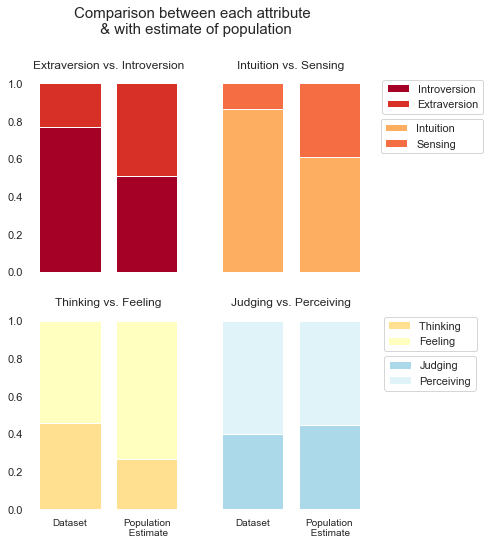

In [48]:
fig, ax = plt.subplots(2,2, figsize=(6,8))

sns.despine(bottom=True, left=True)
x = np.arange(0,2)
x_ticks_labels = ['Dataset','Population\n Estimate']

fig.canvas.draw()

ax[0,0].bar(0, height=barplots_data[0], color=colors_main['I'], edgecolor='white', width=0.8, label="Introversion")
ax[0,0].bar(0, height=(1-barplots_data[0]), bottom=barplots_data[0], color=colors_main['E'], edgecolor='white', width=0.8, label="Extraversion")
ax[0,0].bar(1, height=attributes[0], color=colors_main['I'], edgecolor='white', width=0.8)
ax[0,0].bar(1, height=(1-attributes[0]), bottom=attributes[0], color=colors_main['E'], edgecolor='white', width=0.8)
ax[0,0].set_title('Extraversion vs. Introversion')
ax[0,0].legend(loc='best', bbox_to_anchor=(3,1), ncol=1)

ax[0,1].bar(0, height=barplots_data[2], color=colors_main['N'], edgecolor='white', width=0.8, label="Intuition        ")
ax[0,1].bar(0, height=(1-barplots_data[2]), bottom=barplots_data[2], color=colors_main['S'], edgecolor='white', width=0.8, label="Sensing")
ax[0,1].bar(1, height=attributes[2], color=colors_main['N'], edgecolor='white', width=0.8)
ax[0,1].bar(1, height=(1-attributes[2]), bottom=attributes[2], color=colors_main['S'], edgecolor='white', width=0.8)
ax[0,1].set_title('Intuition vs. Sensing')
ax[0,1].legend(loc='best', bbox_to_anchor=(1.80,0.8), ncol=1)

ax[1,0].bar(0, height=barplots_data[3], color=colors_main['T'], edgecolor='white', width=0.8, label="Thinking    ")
ax[1,0].bar(0, height=(1-barplots_data[3]), bottom=barplots_data[3], color=colors_main['F'], edgecolor='white', width=0.8, label="Feeling")
ax[1,0].bar(1, height=attributes[3], color=colors_main['T'], edgecolor='white', width=0.8)
ax[1,0].bar(1, height=(1-attributes[3]), bottom=attributes[3], color=colors_main['F'], edgecolor='white', width=0.8)
ax[1,0].set_title('Thinking vs. Feeling')
ax[1,0].legend(loc='best', bbox_to_anchor=(2.96,1), ncol=1)
ax[1,0].set_xticks(x) # Set number of ticks for x-axis
ax[1,0].set_xticklabels(x_ticks_labels, fontsize=10) # Set ticks labels for x-axis

ax[1,1].bar(0, height=barplots_data[1], color=colors_main['J'], edgecolor='white', width=0.8, label="Judging")
ax[1,1].bar(0, height=(1-barplots_data[1]), bottom=barplots_data[1], color=colors_main['P'], edgecolor='white', width=0.8, label="Perceiving")
ax[1,1].bar(1, height=attributes[1], color=colors_main['J'], edgecolor='white', width=0.8)
ax[1,1].bar(1, height=(1-attributes[1]), bottom=attributes[1], color=colors_main['P'], edgecolor='white', width=0.8)
ax[1,1].set_title('Judging vs. Perceiving')
ax[1,1].legend(loc='best', bbox_to_anchor=(1.75,0.8), ncol=1)
ax[1,1].set_xticks(x) # Set number of ticks for x-axis
ax[1,1].set_xticklabels(x_ticks_labels, fontsize=10) # Set ticks labels for x-axis

for ax in fig.get_axes():
    ax.label_outer()

plt.figtext(.5,0.95,'Comparison between each attribute \n & with estimate of population',fontsize=15,ha='center')
plt.tight_layout()
plt.savefig('Figures/percent_dataset_attributes_population.png', dpi=300)
                   
plt.show()

## Inferential Statistics

In [108]:
dfc = df

In [111]:
dfc['posts_len_Z_score'] = (dfc['posts_len'] - dfc['posts_len'].mean())/dfc['posts_len'].std(ddof=1)

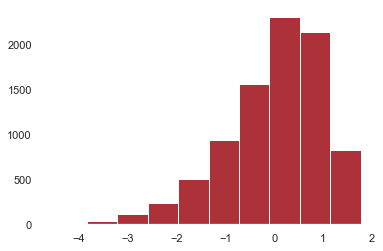

In [113]:
dfc['posts_len_Z_score'].hist()

In [139]:
print(dfc.avg_num_char_x_post.mean())
print(dfc.avg_num_char_x_post.std())

145.46464059537522
28.86814530788622


In [140]:
print(1-(stats.norm(145.46, 28.86).cdf(200))) # percent of people writing more than 200 characters per post on avg.

0.02939149451528633


In [123]:
IJ_table = pd.crosstab(index=dfc["I"],columns=dfc["J"])
IJ_table

J     0     1
I            
0  1497   502
1  3744  2932

In [124]:
chi2, p, ddof, expected = stats.chi2_contingency(IJ_table)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format( chi2, p, ddof ) )
print(expected )

Test Statistic: 226.71100554164104
p-value: 3.109134151777505e-51
Degrees of Freedom: 1

[[1207.69556196  791.30443804]
 [4033.30443804 2642.69556196]]


In [120]:
emojis_table = pd.crosstab(index=dfc["I"],columns=dfc["Total_Emojis"])
emojis_table

Total_Emojis    0     1    2    3    4    5    6    7   8   9   ...  34  35  \
I                                                               ...           
0              729   337  199  157  110   71   74   51  34  39  ...   2   0   
1             2964  1182  641  447  345  225  184  144  95  87  ...   0   1   

Total_Emojis  37  41  42  48  58  59  61  65  
I                                             
0              1   1   2   1   1   1   0   0  
1              0   1   0   0   0   0   1   1  

[2 rows x 42 columns]

In [122]:
chi2, p, ddof, expected = stats.chi2_contingency(emojist_table)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format( chi2, p, ddof ) )
print(expected )

Test Statistic: 135.19104403031122
p-value: 5.476488550122151e-12
Degrees of Freedom: 41

[[8.50986398e+02 3.50026628e+02 1.93563112e+02 1.39181095e+02
  1.04846686e+02 6.82079539e+01 5.94515274e+01 4.49342939e+01
  2.97257637e+01 2.90344669e+01 2.28127954e+01 1.72824207e+01
  1.26737752e+01 1.12911816e+01 1.08303170e+01 7.60426513e+00
  7.83469741e+00 6.68253602e+00 4.83907781e+00 3.22605187e+00
  2.30432277e+00 5.29994236e+00 3.22605187e+00 1.84345821e+00
  1.84345821e+00 1.15216138e+00 1.38259366e+00 1.15216138e+00
  9.21729107e-01 1.38259366e+00 2.30432277e-01 2.30432277e-01
  4.60864553e-01 2.30432277e-01 2.30432277e-01 4.60864553e-01
  4.60864553e-01 2.30432277e-01 2.30432277e-01 2.30432277e-01
  2.30432277e-01 2.30432277e-01]
 [2.84201360e+03 1.16897337e+03 6.46436888e+02 4.64818905e+02
  3.50153314e+02 2.27792046e+02 1.98548473e+02 1.50065706e+02
  9.92742363e+01 9.69655331e+01 7.61872046e+01 5.77175793e+01
  4.23262248e+01 3.77088184e+01 3.61696830e+01 2.53957349e+01
  2.61653

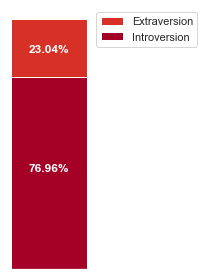

In [49]:
# Gather the Data
I = df['I'].value_counts()/len(df)
Introversion = I[1]
Extraversion = I[0]

# Create Figure
fig, ax = plt.subplots(figsize=(3,4)) 

ax.bar(0, Introversion, color=colors_main['I'], edgecolor='white', width=0.4, label="Introversion")
ax.bar(0, Extraversion, bottom=Introversion, color=colors_main['E'], edgecolor='white', width=0.4, label="Extraversion")

# Custom x axis
plt.xticks([])
plt.yticks([])
 
ax.text(0, 0.88, str(round(Extraversion,4)*100)+'%', color='white', fontweight='bold', ha='center', va='center')
ax.text(0, 0.4, str(round(Introversion,4)*100)+'%', color='white', fontweight='bold', ha='center', va='center')

# Handles ordered
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))

# Add a legend
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Save visualization
plt.tight_layout()
plt.savefig('Figures/Extraversion_Introversion.png', dpi=300)

# Show graphic
plt.show()


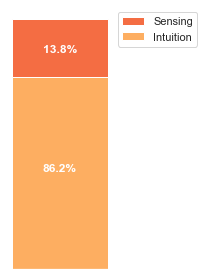

In [50]:
# Gather the Data
N = df['N'].value_counts()/len(df)
Intuition = N[1]
Sensing = N[0]

# Create Figure
fig, ax = plt.subplots(figsize=(3,4)) 

ax.bar(0, Introversion, color=colors_main['N'], edgecolor='white', width=0.4, label="Intuition")
ax.bar(0, Extraversion, bottom=Introversion, color=colors_main['S'], edgecolor='white', width=0.4, label="Sensing")

# Custom x axis
plt.xticks([])
plt.yticks([])
 
ax.text(0, 0.88, str(round(Sensing,4)*100)+'%', color='white', fontweight='bold', ha='center', va='center')
ax.text(0, 0.4, str(round(Intuition,4)*100)+'%', color='white', fontweight='bold', ha='center', va='center')

# Handles ordered
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))

# Add a legend
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Save visualization
plt.tight_layout()
plt.savefig('Figures/Intuition_Sensing.png', dpi=300)

# Show graphic
plt.show()

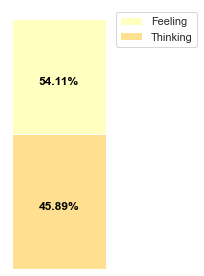

In [51]:
# Gather the Data
T = df['T'].value_counts()/len(df)
Thinking = T[0]
Feeling = T[1]

# Create Figure
fig, ax = plt.subplots(figsize=(3,4)) 

ax.bar(0, Thinking, color=colors_main['T'], edgecolor='white', width=0.4, label="Thinking")
ax.bar(0, Feeling, bottom=Thinking, color=colors_main['F'], edgecolor='white', width=0.4, label="Feeling")

# Custom x axis
plt.xticks([])
plt.yticks([])
 
ax.text(0, 0.75, str(round(Thinking,4)*100)+'%', color='black', fontweight='bold', ha='center', va='center')
ax.text(0, 0.25, str(round(Feeling,4)*100)+'%', color='black', fontweight='bold', ha='center', va='center')

# Handles ordered
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=False))

# Add a legend
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Save visualization
plt.tight_layout()
plt.savefig('Figures/Thinking_Feeling.png', dpi=300)

# Show graphic
plt.show()

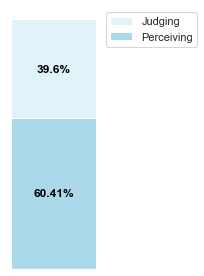

In [52]:
# Gather the Data
J = df['J'].value_counts()/len(df)
Judging = J[1]
Perceiving = J[0]

# Create Figure
fig, ax = plt.subplots(figsize=(3,4)) 

ax.bar(0, Perceiving, color=colors_main['J'], edgecolor='white', width=0.4, label="Perceiving")
ax.bar(0, Judging, bottom=Perceiving, color=colors_main['P'], edgecolor='white', width=0.4, label="Judging")

# Custom x axis
plt.xticks([])
plt.yticks([])
 
ax.text(0, 0.80, str(round(Judging,3)*100)+'%', color='black', fontweight='bold', ha='center', va='center')
ax.text(0, 0.30, str(round(Perceiving,4)*100)+'%', color='black', fontweight='bold', ha='center', va='center')

# Handles ordered
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=False))

# Add a legend
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Save visualization
plt.tight_layout()
plt.savefig('Figures/Judging_Perceiving.png', dpi=300)

# Show graphic
plt.show()

### Avg. Number of characters per post, number of URLS, Use of Emojis

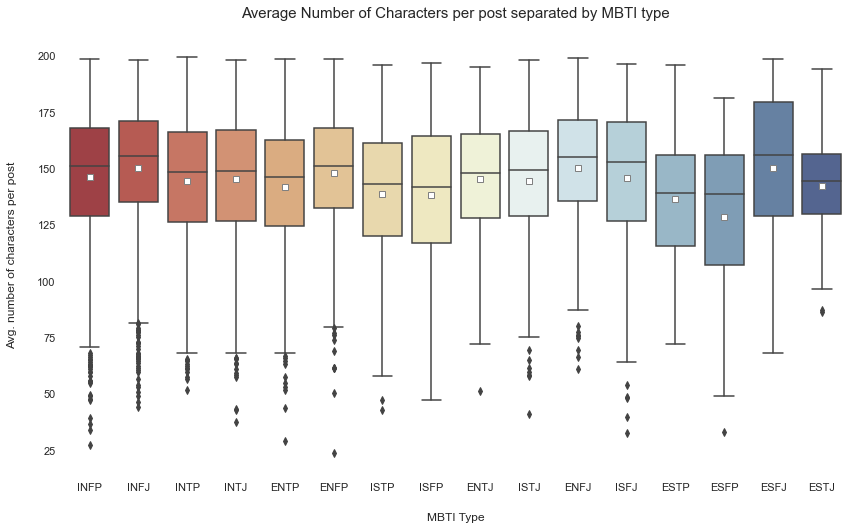

In [53]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_num_char_x_post', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="avg_num_char_x_post", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Average Number of Characters per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. number of characters per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Characters_types.png', dpi=300)

plt.show()

In [54]:
#df_no_outliers = df[df['num_of_links'] < 45]

In [55]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='num_of_links', data=df_no_outliers, order=sorter, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="num_of_links", data=df_no_outliers, color='k', alpha=0.3, order=sorter)

plt.title('Number of Links by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of total links', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Links_types.png', dpi=300)

plt.show()

NameError: name 'df_no_outliers' is not defined

<Figure size 1008x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='Total_Emojis', data=df, order=sorter, showmeans=True, showfliers=False,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="Total_Emojis", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Number of Emojis used separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of emojis used', labelpad=20)

plt.savefig('Figures/Boxplot_Use_Emojis_type.png', dpi=300)

plt.show()

In [ ]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y=':(_count', data=df, order=sorter)
#sns.swarmplot(x='type', y=":(_count", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Number of Sad Emojis used separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of sad emojis used', labelpad=20)

plt.savefig('Figures/Boxplot_Use_Sad_Emojis_types.png', dpi=300)

plt.show()

In [ ]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette(list(colors_keirsey.values())))
sns.boxplot(x='keirsey',y='avg_num_char_x_post', data=df)
#sns.swarmplot(x='keirsey', y="avg_num_char_x_post", data=df, color='k', alpha=0.3)

plt.title('Average Number of Characters per post separated by Keirsey Temperaments', size=15, pad=20)
plt.xlabel('Keirsey Temperaments', labelpad=20)
plt.ylabel('Avg. number of characters per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Characters_Keirsey.png', dpi=300)

plt.show()

In [ ]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette(list(colors_keirsey.values())))
sns.boxplot(x='keirsey',y='num_of_links', data=df_no_outliers, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='keirsey', y="num_of_links", data=df_no_outliers, color='k', alpha=0.3)

plt.title('Number of Links separated by Keirsey Temperaments', size=15, pad=20)
plt.xlabel('Keirsey Temperaments', labelpad=20)
plt.ylabel('Number of total links', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Links_Keirsey.png', dpi=300)

plt.show()

In [ ]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette(list(colors_keirsey.values())))
sns.boxplot(x='keirsey',y='Total_Emojis', data=df, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='keirsey', y="Total_Emojis", data=df, color='k', alpha=0.3)

plt.title('Number of Emojis used separated by Keirsey Temperaments', size=15, pad=20)
plt.xlabel('Keirsey Temperaments', labelpad=20)
plt.ylabel('Number of total links', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Emojis_Keirsey.png', dpi=300)

plt.show()

In [ ]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette(list(colors_keirsey.values())))
sns.boxplot(x='keirsey',y=':(_count', data=df, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='keirsey', y=":(_count", data=df, color='k', alpha=0.3)

plt.title('Number of Sad Emojis used separated by Keirsey Temperaments', size=15, pad=20)
plt.xlabel('Keirsey Temperaments', labelpad=20)
plt.ylabel('Number of total links', labelpad=20)

plt.savefig('Figures/Boxplot_Use_Sad_Emojis.png', dpi=300)

plt.show()

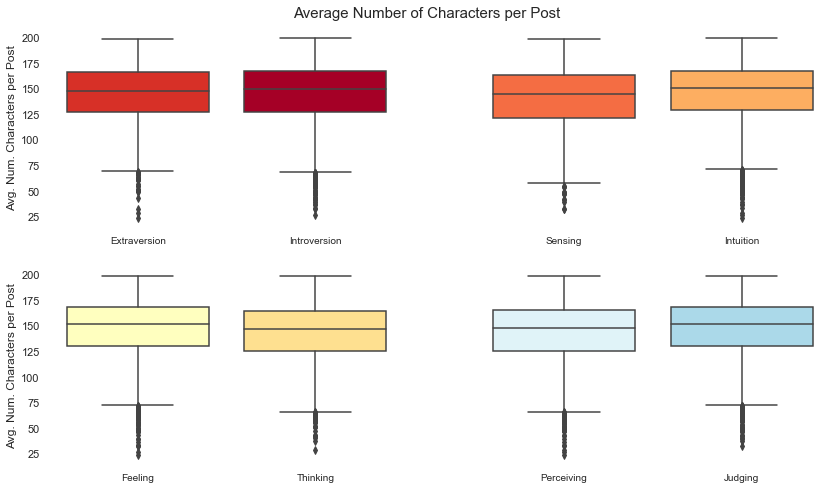

In [141]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

x = np.arange(0,2)
sns.despine(bottom=True, left=True)

ax1 = sns.boxplot(data=df, x='I',  y='avg_num_char_x_post', ax=ax[0,0])
ax[0,0].set_xticks(x) 
ax[0,0].set_xticklabels(['Extraversion', 'Introversion'], fontsize=10)
ax[0,0].set(xlabel='', ylabel='Avg. Num. Characters per Post')
mybox1 = ax1.artists[0]
mybox1.set_facecolor(color=colors_main['E'])
mybox1 = ax1.artists[1]
mybox1.set_facecolor(color=colors_main['I'])

ax2 = sns.boxplot(data=df, x='N',  y='avg_num_char_x_post', ax=ax[0,1])
ax[0,1].yaxis.set_visible(False)
ax[0,1].set_xticklabels(['Sensing', 'Intuition'], fontsize=10)
ax[0,1].set(xlabel='')
mybox2 = ax2.artists[0]
mybox2.set_facecolor(color=colors_main['S'])
mybox2 = ax2.artists[1]
mybox2.set_facecolor(color=colors_main['N'])

ax3 = sns.boxplot(data=df, x='T',  y='avg_num_char_x_post', ax=ax[1,0])
ax[1,0].set_xticklabels(['Feeling', 'Thinking'], fontsize=10)
ax[1,0].set(xlabel='', ylabel='Avg. Num. Characters per Post')
mybox3 = ax3.artists[0]
mybox3.set_facecolor(color=colors_main['F'])
mybox3 = ax3.artists[1]
mybox3.set_facecolor(color=colors_main['T'])

ax4 = sns.boxplot(data=df, x='J',  y='avg_num_char_x_post', ax=ax[1,1])
ax[1,1].yaxis.set_visible(False)
ax[1,1].set_xticklabels(['Perceiving', 'Judging'], fontsize=10)
ax[1,1].set(xlabel='')
mybox4 = ax4.artists[0]
mybox4.set_facecolor(color=colors_main['P'])
mybox4 = ax4.artists[1]
mybox4.set_facecolor(color=colors_main['J'])

plt.figtext(.5,0.90,'Average Number of Characters per Post',fontsize=15,ha='center')

plt.savefig('Figures/Boxplot_Avg_Char_Attributes.png', dpi=300)

plt.show()

In [56]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [57]:
for attribute in ['I','N','T', 'J']:
    a = df[attribute]
    b = df['avg_num_char_x_post']
    
    print(color.BOLD + 'Attribute '+ attribute +color.END)
    print(stats.pointbiserialr(a, b))
    print(stats.pearsonr(a, b))
    print(np.corrcoef(a, b))
    print('----------------------------')

Attribute I
PointbiserialrResult(correlation=0.016602325777696283, pvalue=0.12205167672677185)
(0.016602325777696283, 0.12205167672677185)
[[1.         0.01660233]
 [0.01660233 1.        ]]
----------------------------
Attribute N
PointbiserialrResult(correlation=0.07195529174482254, pvalue=1.951249265218757e-11)
(0.07195529174482254, 1.951249265218757e-11)
[[1.         0.07195529]
 [0.07195529 1.        ]]
----------------------------
Attribute T
PointbiserialrResult(correlation=-0.06586227524789745, pvalue=8.243085354563832e-10)
(-0.06586227524789745, 8.243085354563832e-10)
[[ 1.         -0.06586228]
 [-0.06586228  1.        ]]
----------------------------
Attribute J
PointbiserialrResult(correlation=0.056838663214642884, pvalue=1.1742805376462704e-07)
(0.056838663214642884, 1.1742805376462704e-07)
[[1.         0.05683866]
 [0.05683866 1.        ]]
----------------------------


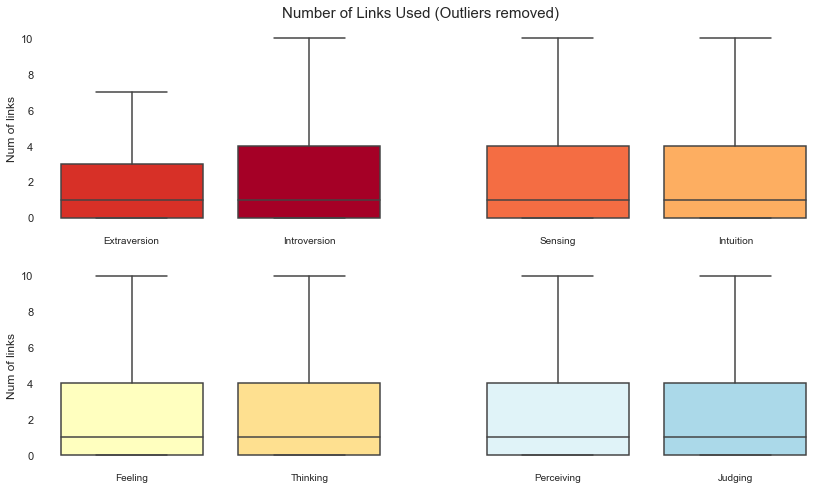

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

x = np.arange(0,2)
sns.despine(bottom=True, left=True)

ax1 = sns.boxplot(data=df, x='I',  y='num_of_links', showfliers=False, ax=ax[0,0], )
ax[0,0].set_xticks(x) 
ax[0,0].set_xticklabels(['Extraversion', 'Introversion'], fontsize=10)
ax[0,0].set(xlabel='', ylabel='Num of links')
mybox1 = ax1.artists[0]
mybox1.set_facecolor(color=colors_main['E'])
mybox1 = ax1.artists[1]
mybox1.set_facecolor(color=colors_main['I'])

ax2 = sns.boxplot(data=df, x='N',  y='num_of_links',showfliers=False, ax=ax[0,1])
ax[0,1].yaxis.set_visible(False)
ax[0,1].set_xticklabels(['Sensing', 'Intuition'], fontsize=10)
ax[0,1].set(xlabel='')
mybox2 = ax2.artists[0]
mybox2.set_facecolor(color=colors_main['S'])
mybox2 = ax2.artists[1]
mybox2.set_facecolor(color=colors_main['N'])

ax3 = sns.boxplot(data=df, x='T',  y='num_of_links', showfliers=False, ax=ax[1,0])
ax[1,0].set_xticklabels(['Feeling', 'Thinking'], fontsize=10)
ax[1,0].set(xlabel='', ylabel='Num of links')
mybox3 = ax3.artists[0]
mybox3.set_facecolor(color=colors_main['F'])
mybox3 = ax3.artists[1]
mybox3.set_facecolor(color=colors_main['T'])

ax4 = sns.boxplot(data=df, x='J',  y='num_of_links', showfliers=False, ax=ax[1,1])
ax[1,1].yaxis.set_visible(False)
ax[1,1].set_xticklabels(['Perceiving', 'Judging'], fontsize=10)
ax[1,1].set(xlabel='')
mybox4 = ax4.artists[0]
mybox4.set_facecolor(color=colors_main['P'])
mybox4 = ax4.artists[1]
mybox4.set_facecolor(color=colors_main['J'])

plt.figtext(.5,0.90,'Number of Links Used (Outliers removed)',fontsize=15,ha='center')

plt.savefig('Figures/Boxplot_Num_Links_Attributes.png', dpi=300)

plt.show()

In [59]:
for attribute in ['I','N','T', 'J']:
    a = df[attribute]
    b = df['num_of_links']
    
    print(color.BOLD + 'Attribute '+ attribute +color.END)
    print(stats.pointbiserialr(a, b))
    print(stats.pearsonr(a, b))
    print(np.corrcoef(a, b))
    print('----------------------------')

Attribute I
PointbiserialrResult(correlation=0.07318111891079167, pvalue=8.839511115173973e-12)
(0.07318111891079167, 8.839511115173973e-12)
[[1.         0.07318112]
 [0.07318112 1.        ]]
----------------------------
Attribute N
PointbiserialrResult(correlation=-0.02311479635767842, pvalue=0.03132794441092252)
(-0.02311479635767842, 0.03132794441092252)
[[ 1.        -0.0231148]
 [-0.0231148  1.       ]]
----------------------------
Attribute T
PointbiserialrResult(correlation=-0.01685171183795139, pvalue=0.11654351588492234)
(-0.01685171183795139, 0.11654351588492234)
[[ 1.         -0.01685171]
 [-0.01685171  1.        ]]
----------------------------
Attribute J
PointbiserialrResult(correlation=-0.022114486770938715, pvalue=0.0394280643094046)
(-0.022114486770938715, 0.0394280643094046)
[[ 1.         -0.02211449]
 [-0.02211449  1.        ]]
----------------------------


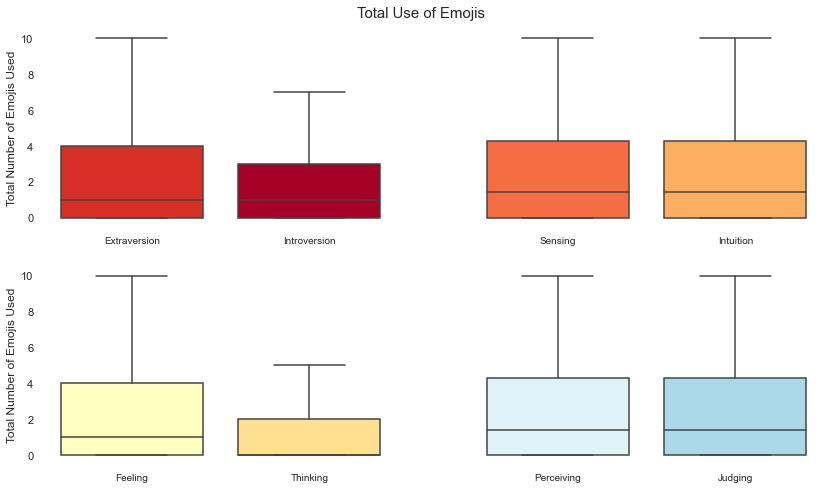

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

x = np.arange(0,2)
sns.despine(bottom=True, left=True)

ax1 = sns.boxplot(data=df, x='I',  y='Total_Emojis', showfliers=False, ax=ax[0,0])
ax[0,0].set_xticks(x) 
ax[0,0].set_xticklabels(['Extraversion', 'Introversion'], fontsize=10)
ax[0,0].set(xlabel='', ylabel='Total Number of Emojis Used')
mybox1 = ax1.artists[0]
mybox1.set_facecolor(color=colors_main['E'])
mybox1 = ax1.artists[1]
mybox1.set_facecolor(color=colors_main['I'])

ax2 = sns.boxplot(data=df, x='N',  y='Total_Emojis', showfliers=False,ax=ax[0,1])
ax[0,1].yaxis.set_visible(False)
ax[0,1].set_xticklabels(['Sensing', 'Intuition'], fontsize=10)
ax[0,1].set(xlabel='')
mybox2 = ax2.artists[0]
mybox2.set_facecolor(color=colors_main['S'])
mybox2 = ax2.artists[1]
mybox2.set_facecolor(color=colors_main['N'])

ax3 = sns.boxplot(data=df, x='T',  y='Total_Emojis', showfliers=False, ax=ax[1,0])
ax[1,0].set_xticklabels(['Feeling', 'Thinking'], fontsize=10)
ax[1,0].set(xlabel='', ylabel='Total Number of Emojis Used')
mybox3 = ax3.artists[0]
mybox3.set_facecolor(color=colors_main['F'])
mybox3 = ax3.artists[1]
mybox3.set_facecolor(color=colors_main['T'])

ax4 = sns.boxplot(data=df, x='J',  y='Total_Emojis', showfliers=False, ax=ax[1,1])
ax[1,1].yaxis.set_visible(False)
ax[1,1].set_xticklabels(['Perceiving', 'Judging'], fontsize=10)
ax[1,1].set(xlabel='')
mybox4 = ax4.artists[0]
mybox4.set_facecolor(color=colors_main['P'])
mybox4 = ax4.artists[1]
mybox4.set_facecolor(color=colors_main['J'])

plt.figtext(.5,0.90,'Total Use of Emojis',fontsize=15,ha='center')

plt.savefig('Figures/Boxplot_Total_Emojis_Attributes.png', dpi=300)

plt.show()

In [61]:
for attribute in ['I','N','T', 'J']:
    a = df[attribute]
    b = df['Total_Emojis']
    
    print(color.BOLD + 'Attribute '+ attribute +color.END)
    print(stats.pointbiserialr(a, b))
    print(stats.pearsonr(a, b))
    print(np.corrcoef(a, b))
    print('----------------------------')

Attribute I
PointbiserialrResult(correlation=-0.10023577692053277, pvalue=8.113869455196243e-21)
(-0.10023577692053277, 8.113869455196243e-21)
[[ 1.         -0.10023578]
 [-0.10023578  1.        ]]
----------------------------
Attribute N
PointbiserialrResult(correlation=0.0014795683986173743, pvalue=0.8904089607953617)
(0.0014795683986173743, 0.8904089607953617)
[[1.         0.00147957]
 [0.00147957 1.        ]]
----------------------------
Attribute T
PointbiserialrResult(correlation=-0.1969038476250931, pvalue=1.4649082130332285e-76)
(-0.1969038476250931, 1.4649082130332285e-76)
[[ 1.         -0.19690385]
 [-0.19690385  1.        ]]
----------------------------
Attribute J
PointbiserialrResult(correlation=-0.030890349178262867, pvalue=0.004009806354136205)
(-0.030890349178262867, 0.004009806354136205)
[[ 1.         -0.03089035]
 [-0.03089035  1.        ]]
----------------------------


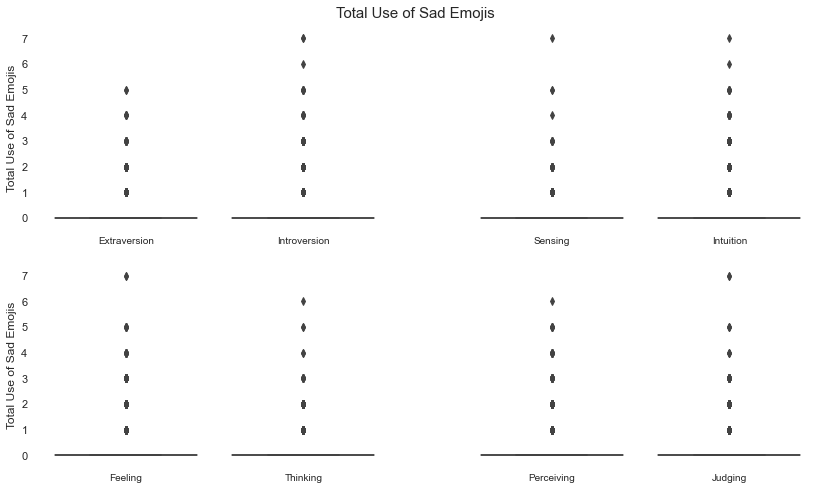

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

x = np.arange(0,2)
sns.despine(bottom=True, left=True)

ax1 = sns.boxplot(data=df, x='I',  y=':(_count', ax=ax[0,0])
ax[0,0].set_xticks(x) 
ax[0,0].set_xticklabels(['Extraversion', 'Introversion'], fontsize=10)
ax[0,0].set(xlabel='', ylabel='Total Use of Sad Emojis')
mybox1 = ax1.artists[0]
mybox1.set_facecolor(color=colors_main['E'])
mybox1 = ax1.artists[1]
mybox1.set_facecolor(color=colors_main['I'])

ax2 = sns.boxplot(data=df, x='N',  y=':(_count', ax=ax[0,1])
ax[0,1].yaxis.set_visible(False)
ax[0,1].set_xticklabels(['Sensing', 'Intuition'], fontsize=10)
ax[0,1].set(xlabel='')
mybox2 = ax2.artists[0]
mybox2.set_facecolor(color=colors_main['S'])
mybox2 = ax2.artists[1]
mybox2.set_facecolor(color=colors_main['N'])

ax3 = sns.boxplot(data=df, x='T',  y=':(_count', ax=ax[1,0])
ax[1,0].set_xticklabels(['Feeling', 'Thinking'], fontsize=10)
ax[1,0].set(xlabel='', ylabel='Total Use of Sad Emojis')
mybox3 = ax3.artists[0]
mybox3.set_facecolor(color=colors_main['F'])
mybox3 = ax3.artists[1]
mybox3.set_facecolor(color=colors_main['T'])

ax4 = sns.boxplot(data=df, x='J',  y=':(_count', ax=ax[1,1])
ax[1,1].yaxis.set_visible(False)
ax[1,1].set_xticklabels(['Perceiving', 'Judging'], fontsize=10)
ax[1,1].set(xlabel='')
mybox4 = ax4.artists[0]
mybox4.set_facecolor(color=colors_main['P'])
mybox4 = ax4.artists[1]
mybox4.set_facecolor(color=colors_main['J'])

plt.figtext(.5,0.90,'Total Use of Sad Emojis',fontsize=15,ha='center')

plt.savefig('Figures/Boxplot_Total_Sad_Emojis_Attributes.png', dpi=300)


### Heatmaps

In [63]:
df_heatmap = df.set_index('type')

In [64]:
df_heatmap = df_heatmap.drop('keirsey', axis=1)

In [65]:
# We normalize the columns 
df_norm_col=(df_heatmap-df_heatmap.mean())/df_heatmap.std()

In [66]:
# There are fields that really do not add a lot of value because they are clearly correlated with the target label, we will drop them to keep the range in place
drop = ['I','J','N','T','NT','NF','SP','SJ', 'ENFJ','ENFP','ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',  'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

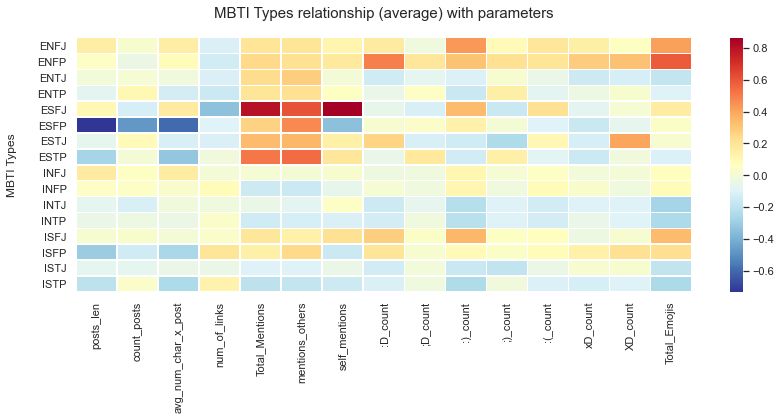

In [67]:
plt.figure(figsize=(12,6))
           
ax = sns.heatmap(df_norm_col.drop(drop, axis=1).groupby('type').mean(), cmap='RdYlBu_r', linewidths=0.5)

plt.ylabel('MBTI Types', labelpad=20)
plt.title('MBTI Types relationship (average) with parameters', size=15, pad=20)

plt.tight_layout()
plt.savefig('Figures/Heatmap_target.png', dpi=300)


plt.show()

In [90]:
x = df_norm_col.index == 'INFP'
y = df_norm_col.posts_len

In [ ]:
#for index, value in df_norm_col.iterrows():
#    for m_type in mbti_types:
       

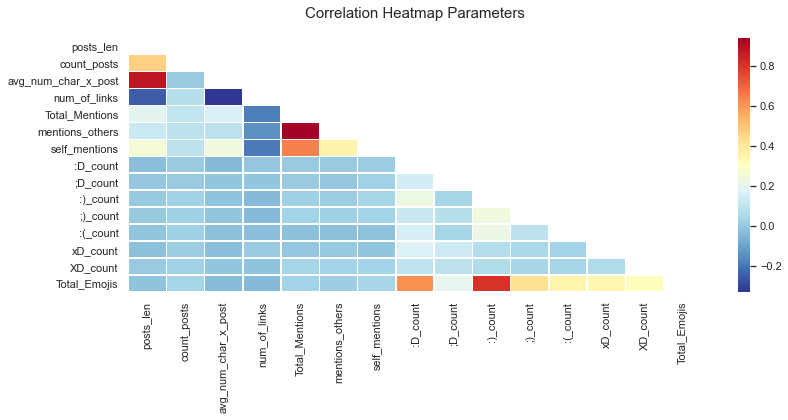

In [68]:
plt.figure(figsize=(12,6))

df_corr = df_heatmap.drop(drop,axis=1).corr()

mask = np.zeros(df_corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(df_corr, cmap='RdYlBu_r', mask = mask, linewidths=0.5)

plt.title('Correlation Heatmap Parameters', size=15, pad=20)
plt.tight_layout()
plt.savefig('Figures/Heatmap.png', dpi=300)

plt.show()

### Chord Diagram Mentions

In [57]:
from chord import Chord

In [58]:
df_mentions = df.iloc[:,13:29]

In [59]:
columns = df_mentions.columns.to_list()

In [60]:
df_mentions.columns = [re.sub(r'\_.*$','',s) for s in columns]


In [61]:
df_mentions = df_mentions.join(df['type'])

In [62]:
df_chord = df_mentions.groupby('type').sum()

In [63]:
df_chord.sort_index(axis=1, inplace=True)

In [64]:
matrix = [[1149,  211,   99,   79,   90,   70,   52,   63,  329,  358,  220, 153,   60,   62,  137,  125],
       [ 446, 4263,  388,  722,  273,  342,  218,  264,  817,  962, 1193, 462,  287,  306,  537,  473],
       [ 159,  224, 1267,  247,   99,  111,  141,  121,  196,  253,  440, 288,  112,  141,  126,  126],
       [ 292,  842,  509, 3925,  326,  250,  245,  466,  928,  631,  916, 980,  378,  343,  360,  307],
       [  37,   48,   21,   51,  401,   32,   32,   14,   41,   54,   55, 118,   49,   52,   26,   23],
       [  24,   80,   46,   52,   39,  186,   33,   63,   62,   39,   74, 42,   30,   47,   23,   24],
       [  19,   59,   46,   32,   25,   19,  240,   30,   37,   66,   33, 25,   17,   29,   40,   24],
       [  50,   87,   80,  134,   72,   90,   51,  567,  129,   76,  113, 106,   72,   49,   92,  128],
       [ 913, 1316,  491, 1254,  461,  484,  369,  605, 8229, 2046, 1768, 1237,  623,  612,  608,  591],
       [ 977, 1472,  722,  733,  554,  456,  617,  485, 1739, 9549, 1507, 1420,  615,  835,  808,  591],
       [ 316,  999,  582,  728,  397,  397,  236,  319, 1145,  973, 6246, 1135,  410,  358,  628,  361],
       [ 417,  616,  596, 1026,  535,  391,  313,  333,  998, 1211, 1651, 6444,  439,  373,  607,  581],
       [  78,   90,   72,   95,  118,   71,   68,   61,  189,  192,  133, 174, 1077,  118,  176,  111],
       [ 149,  252,  148,  150,  165,  205,  113,  158,  303,  429,  228, 230,  216, 1288,  191,  225],
       [  60,  177,   43,   88,  101,   73,   82,   55,  129,  146,  210, 166,  117,   97, 1081,   89],
       [ 112,  172,  108,  179,   95,   87,  119,  209,  174,  218,  248, 279,   99,  129,  168, 1607]]

In [65]:
names = df_chord.columns

In [66]:
Chord(matrix,names, wrap_labels=False, font_size_large=10).show()

**What this graph is telling us is how many times each MBTI type mentions the other types and it self references** However, there is some missing data. We can see that INFJs mention 2046 times the INFPs but INFPs mention 1739 INFJs and that figure cannot be seen in the chord diagram. 

After looking at the documentation for the chord package we can see that our matrix has to be symmetrical, so we can add both sides. This means losing some relevant information. We would be "adding cross mentions".

### Sankey Diagram Mentions

In [67]:
import plotly
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs
init_notebook_mode(connected=True)         # initiate notebook for offline plot

In [68]:
df_sankey = df_chord.reset_index()

In [69]:
mentions = ['ENFJ_mentions',
 'ENFP_mentions',
 'ENTJ_mentions',
 'ENTP_mentions',
 'ESFJ_mentions',
 'ESFP_mentions',
 'ESTJ_mentions',
 'ESTP_mentions',
 'INFJ_mentions',
 'INFP_mentions',
 'INTJ_mentions',
 'INTP_mentions',
 'ISFJ_mentions',
 'ISFP_mentions',
 'ISTJ_mentions',
 'ISTP_mentions']

In [70]:
df_sankey.columns = ['type', 'ENFJ_mentions',
 'ENFP_mentions',
 'ENTJ_mentions',
 'ENTP_mentions',
 'ESFJ_mentions',
 'ESFP_mentions',
 'ESTJ_mentions',
 'ESTP_mentions',
 'INFJ_mentions',
 'INFP_mentions',
 'INTJ_mentions',
 'INTP_mentions',
 'ISFJ_mentions',
 'ISFP_mentions',
 'ISTJ_mentions',
 'ISTP_mentions']

In [71]:
df_sankey = df_sankey.melt(id_vars='type', value_vars=mentions)

In [72]:
df_sankey.head()

type       variable  value
0  ENFJ  ENFJ_mentions   1149
1  ENFP  ENFJ_mentions    446
2  ENTJ  ENFJ_mentions    159
3  ENTP  ENFJ_mentions    292
4  ESFJ  ENFJ_mentions     37

In [73]:
def genSankey_html(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count'],
            color='rgba(100,255,255,0.10)'
        )
      )
    
    layout =  dict(title = title, font = dict(size = 10), autosize=False, width=1400, height=1800)
       
    fig = dict(data=[data], layout=layout)
    return fig

def genSankey_notebook(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    fig = go.Figure(go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count'],
        color='rgba(100,255,255,0.10)'
        )
      )]))
    
    fig.update_layout(title_text=title, font_size=10, autosize=False, width=1300, height=1800)
    fig.show()

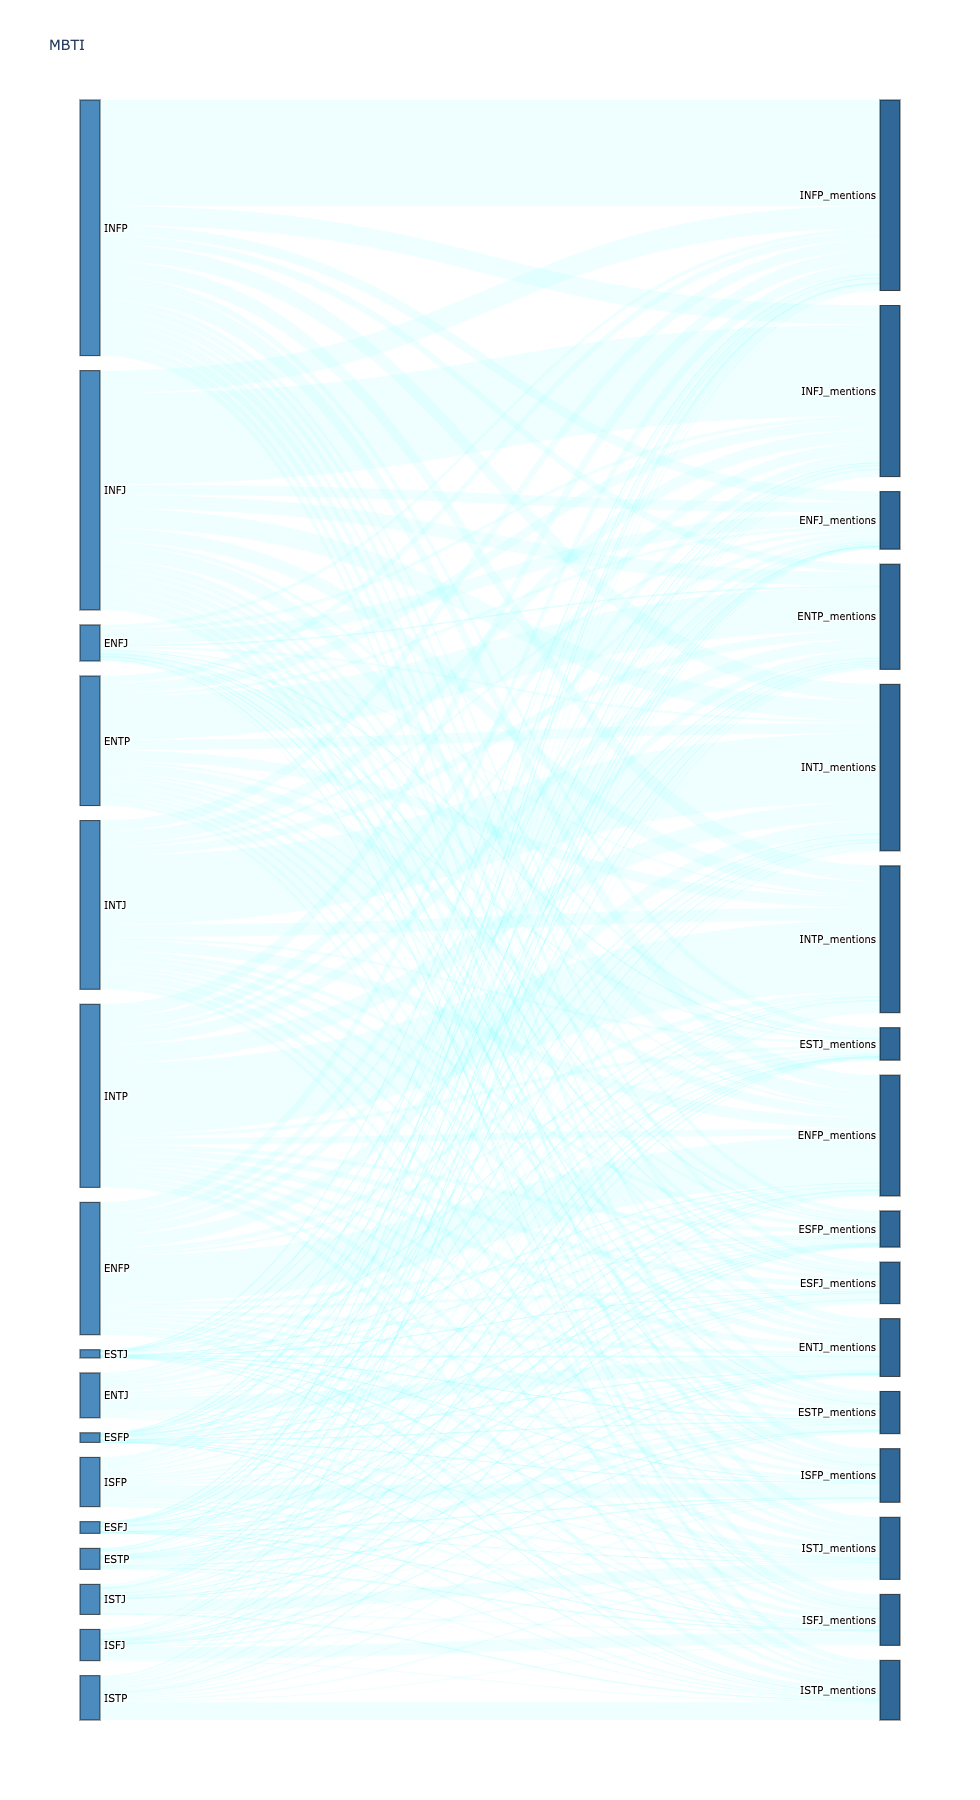

In [74]:
genSankey_notebook(df_sankey,cat_cols=['type','variable'],value_cols='value',title='MBTI')

### For a HTML version

In [75]:
fig = genSankey_html(df_sankey,cat_cols=['type','variable'],value_cols='value',title='MBTI')

plotly.offline.plot(fig, filename = 'Figures/sankey.html', validate=False, auto_open=False)

'Figures/sankey.html'

<br>
Unfortuantely this is still a bit tricky to understand since we have many variables. Let's do it with percentages and a bar plot

### Percentages

In [76]:
totals = df.groupby('type').Total_Mentions.sum()

In [77]:
df_chord.sum(axis=1)

type
ENFJ     3257
ENFP    11953
ENTJ     4051
ENTP    11698
ESFJ     1054
ESFP      864
ESTJ      741
ESTP     1896
INFJ    21607
INFP    23080
INTJ    15230
INTP    16531
ISFJ     2823
ISFP     4450
ISTJ     2714
ISTP     4003
dtype: int64

In [78]:
df_percentages = df_chord.div(totals, axis=0)

In [79]:
df_percentages.head()

ENFJ      ENFP      ENTJ      ENTP      ESFJ      ESFP      ESTJ  \
type                                                                         
ENFJ  0.352779  0.064784  0.030396  0.024255  0.027633  0.021492  0.015966   
ENFP  0.037313  0.356647  0.032460  0.060403  0.022839  0.028612  0.018238   
ENTJ  0.039250  0.055295  0.312762  0.060973  0.024438  0.027401  0.034806   
ENTP  0.024962  0.071978  0.043512  0.335527  0.027868  0.021371  0.020944   
ESFJ  0.035104  0.045541  0.019924  0.048387  0.380455  0.030361  0.030361   

          ESTP      INFJ      INFP      INTJ      INTP      ISFJ      ISFP  \
type                                                                         
ENFJ  0.019343  0.101013  0.109917  0.067547  0.046976  0.018422  0.019036   
ENFP  0.022087  0.068351  0.080482  0.099808  0.038651  0.024011  0.025600   
ENTJ  0.029869  0.048383  0.062454  0.108615  0.071094  0.027647  0.034806   
ENTP  0.039836  0.079330  0.053941  0.078304  0.083775  0.032313  0.029321   
ESFJ  0.013283  0.038899  0.051233  0.052182  0.111954  0.046490  0.049336   

          ISTJ      ISTP  
type                      
ENFJ  0.042063  0.038379  
ENFP  0.044926  0.039572  
ENTJ  0.031103  0.031103  
ENTP  0.030774  0.026244  
ESFJ  0.024668  0.021822

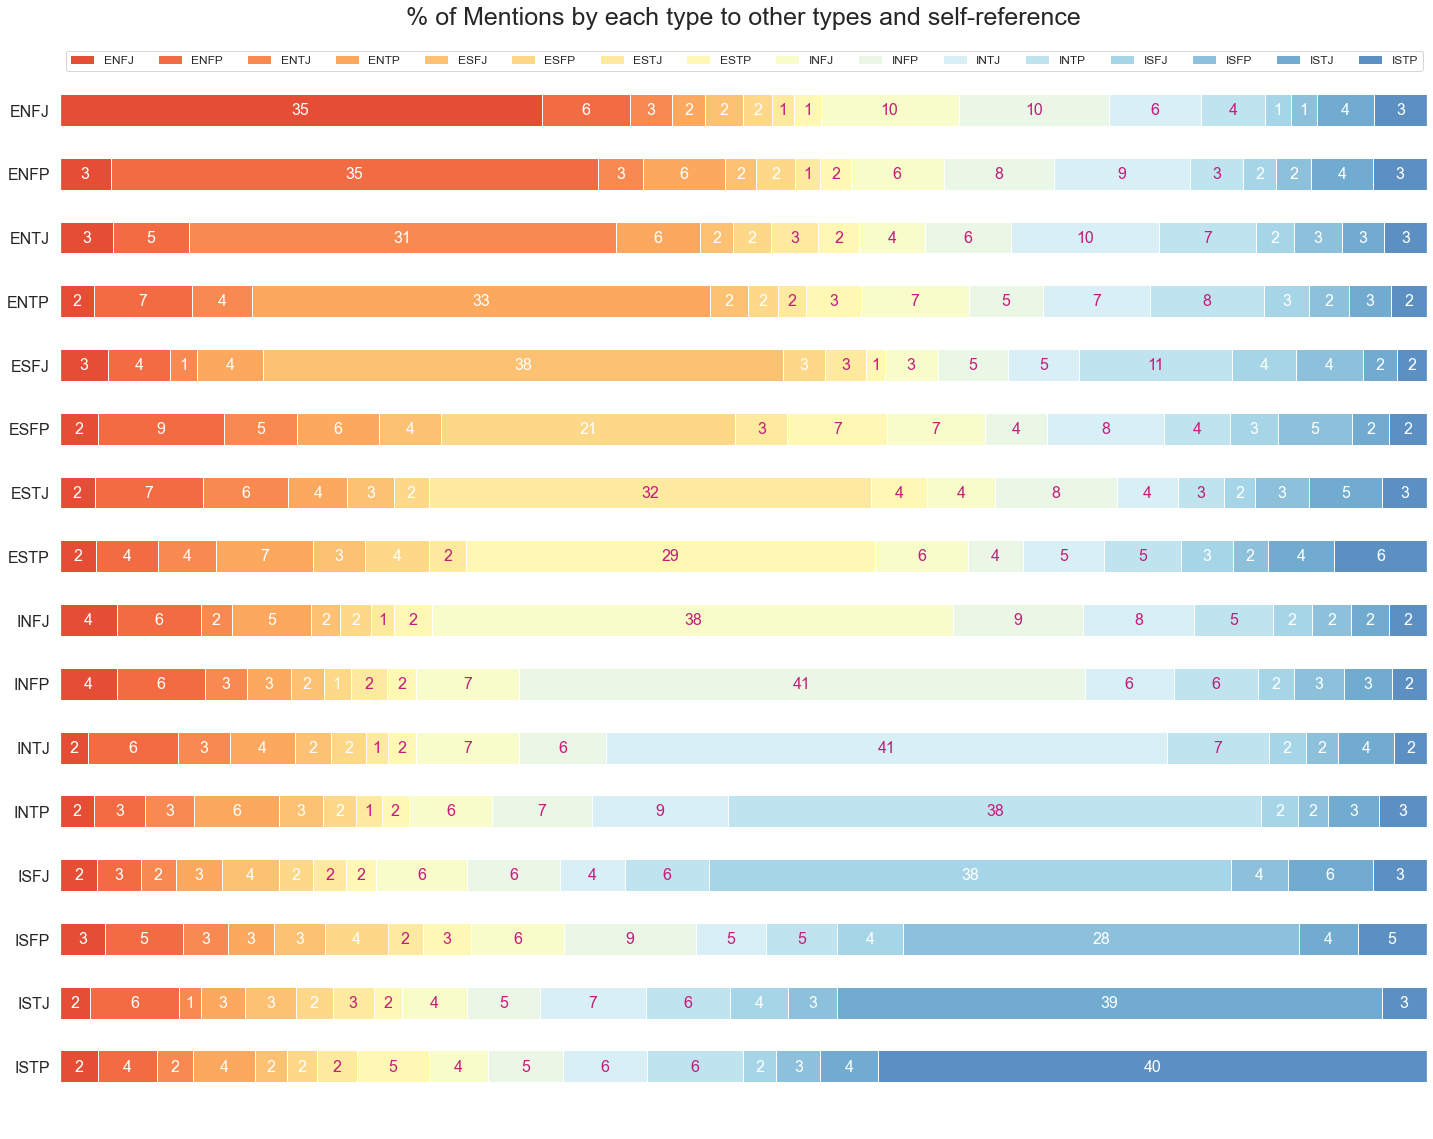

In [80]:
results = df_percentages.T.to_dict('list')
category_names = df_percentages.columns


labels = list(results.keys())
data = np.array(list(results.values()))
data = data*100
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlBu')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(24.5, 20))
ax.invert_yaxis()
ax.set_yticklabels(category_names,fontsize=16)
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else '#c41e7c'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), fontsize=16, ha='center', va='center',
                color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='upper left', fontsize='medium', facecolor=None)

plt.title('% of Mentions by each type to other types and self-reference', size=25, pad=20)

plt.show()
fig.savefig('Figures/mentions.png', dpi=300)

<br>
Seems interesting that the SPs have a lower self-metioning percentage in general, let's check this same data for Kersey's temperaments 

In [81]:
df_keirsey = df.groupby('keirsey').sum().iloc[:,12:28]

In [82]:
totals = df.groupby('keirsey').Total_Mentions.sum()

In [83]:
totals

keirsey
NF    59897
NT    47510
SJ     7332
SP    11213
Name: Total_Mentions, dtype: int64

In [84]:
df_keirsey_pct = df_keirsey.div(totals, axis=0)

In [85]:
df_keirsey_pct.sum(axis=1)

keirsey
NF    1.0
NT    1.0
SJ    1.0
SP    1.0
dtype: float64

In [86]:
new_column_names = ['NF', 'NT', 'NT', 'NT','NT', 'NF', 'NF', 'NF','SP', 'SP', 'SJ', 'SJ','SP', 'SP', 'SJ', 'SJ']

In [87]:
df_keirsey_pct.columns = new_column_names

In [88]:
df_keirsey_pct = df_keirsey_pct.groupby(lambda x:x, axis=1).sum()

In [89]:
plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.85, data.shape[1]))

array([[0.89888504, 0.30549789, 0.20676663, 1.        ],
       [0.95240292, 0.41806997, 0.25843906, 1.        ],
       [0.97208766, 0.53740869, 0.31349481, 1.        ],
       [0.98869666, 0.65736255, 0.36885813, 1.        ],
       [0.99361784, 0.75540177, 0.44905805, 1.        ],
       [0.99546328, 0.84767397, 0.53579393, 1.        ],
       [0.99730873, 0.91657055, 0.6225298 , 1.        ],
       [0.99915417, 0.97377932, 0.70926567, 1.        ],
       [0.97377932, 0.98985006, 0.79723183, 1.        ],
       [0.91657055, 0.96770473, 0.90242215, 1.        ],
       [0.84582853, 0.93694733, 0.9633218 , 1.        ],
       [0.74801999, 0.88896578, 0.93564014, 1.        ],
       [0.64944252, 0.83406382, 0.90449827, 1.        ],
       [0.5479431 , 0.75286428, 0.86020761, 1.        ],
       [0.44767397, 0.6698193 , 0.81514802, 1.        ],
       [0.3609381 , 0.56647443, 0.76163014, 1.        ]])

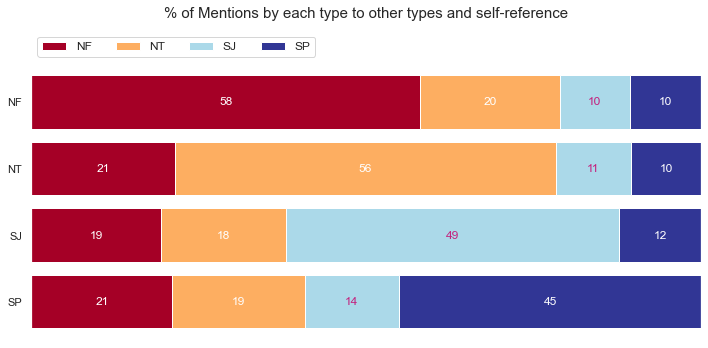

In [90]:
results = df_keirsey_pct.T.to_dict('list')
category_names = df_keirsey_pct.columns


labels = list(results.keys())
data = np.array(list(results.values()))
data = data*100
data_cum = data.cumsum(axis=1)
category_colors = colors_keirsey_rgb_pct.values() 

fig, ax = plt.subplots(figsize=(10, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.8,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else '#c41e7c'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center',
                color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium', facecolor='white')

plt.title('% of Mentions by each type to other types and self-reference', size=15, pad=45)
plt.tight_layout()

plt.show()
fig.savefig('Figures/keirsey_mentions.png', dpi=300)


Apparently the focus is more on the "NFs" and "NTs" rather than the "SPs" and "SJs"

show only the most mentioned types and order them by percentage (top 3), second chart, % of mentions about themselves
What percentage of the words they mention are types.
Go from general to specifics.

In [91]:
df_percentages

ENFJ      ENFP      ENTJ      ENTP      ESFJ      ESFP      ESTJ  \
type                                                                         
ENFJ  0.352779  0.064784  0.030396  0.024255  0.027633  0.021492  0.015966   
ENFP  0.037313  0.356647  0.032460  0.060403  0.022839  0.028612  0.018238   
ENTJ  0.039250  0.055295  0.312762  0.060973  0.024438  0.027401  0.034806   
ENTP  0.024962  0.071978  0.043512  0.335527  0.027868  0.021371  0.020944   
ESFJ  0.035104  0.045541  0.019924  0.048387  0.380455  0.030361  0.030361   
ESFP  0.027778  0.092593  0.053241  0.060185  0.045139  0.215278  0.038194   
ESTJ  0.025641  0.079622  0.062078  0.043185  0.033738  0.025641  0.323887   
ESTP  0.026371  0.045886  0.042194  0.070675  0.037975  0.047468  0.026899   
INFJ  0.042255  0.060906  0.022724  0.058037  0.021336  0.022400  0.017078   
INFP  0.042331  0.063778  0.031282  0.031759  0.024003  0.019757  0.026733   
INTJ  0.020749  0.065594  0.038214  0.047800  0.026067  0.026067  0.015496   
INTP  0.025225  0.037263  0.036053  0.062065  0.032363  0.023653  0.018934   
ISFJ  0.027630  0.031881  0.025505  0.033652  0.041800  0.025151  0.024088   
ISFP  0.033483  0.056629  0.033258  0.033708  0.037079  0.046067  0.025393   
ISTJ  0.022108  0.065217  0.015844  0.032424  0.037214  0.026898  0.030214   
ISTP  0.027979  0.042968  0.026980  0.044716  0.023732  0.021734  0.029728   

          ESTP      INFJ      INFP      INTJ      INTP      ISFJ      ISFP  \
type                                                                         
ENFJ  0.019343  0.101013  0.109917  0.067547  0.046976  0.018422  0.019036   
ENFP  0.022087  0.068351  0.080482  0.099808  0.038651  0.024011  0.025600   
ENTJ  0.029869  0.048383  0.062454  0.108615  0.071094  0.027647  0.034806   
ENTP  0.039836  0.079330  0.053941  0.078304  0.083775  0.032313  0.029321   
ESFJ  0.013283  0.038899  0.051233  0.052182  0.111954  0.046490  0.049336   
ESFP  0.072917  0.071759  0.045139  0.085648  0.048611  0.034722  0.054398   
ESTJ  0.040486  0.049933  0.089069  0.044534  0.033738  0.022942  0.039136   
ESTP  0.299051  0.068038  0.040084  0.059599  0.055907  0.037975  0.025844   
INFJ  0.028000  0.380849  0.094692  0.081825  0.057250  0.028833  0.028324   
INFP  0.021014  0.075347  0.413735  0.065295  0.061525  0.026646  0.036179   
INTJ  0.020946  0.075181  0.063887  0.410112  0.074524  0.026921  0.023506   
INTP  0.020144  0.060371  0.073256  0.099873  0.389813  0.026556  0.022564   
ISFJ  0.021608  0.066950  0.068013  0.047113  0.061637  0.381509  0.041800   
ISFP  0.035506  0.068090  0.096404  0.051236  0.051685  0.048539  0.289438   
ISTJ  0.020265  0.047531  0.053795  0.077377  0.061164  0.043110  0.035741   
ISTP  0.052211  0.043467  0.054459  0.061954  0.069698  0.024731  0.032226   

          ISTJ      ISTP  
type                      
ENFJ  0.042063  0.038379  
ENFP  0.044926  0.039572  
ENTJ  0.031103  0.031103  
ENTP  0.030774  0.026244  
ESFJ  0.024668  0.021822  
ESFP  0.026620  0.027778  
ESTJ  0.053981  0.032389  
ESTP  0.048523  0.067511  
INFJ  0.028139  0.027352  
INFP  0.035009  0.025607  
INTJ  0.041234  0.023703  
INTP  0.036719  0.035146  
ISFJ  0.062345  0.039320  
ISFP  0.042921  0.050562  
ISTJ  0.398305  0.032793  
ISTP  0.041969  0.401449

In [92]:
newdf = df_percentages.apply(np.sort, axis=1).apply(lambda x: x[12:]).apply(pd.Series)
newdf.columns = ['Top3','Top2', 'Top1', 'Self']

In [93]:
newdf

Top3      Top2      Top1      Self
type                                        
ENFJ  0.067547  0.101013  0.109917  0.352779
ENFP  0.068351  0.080482  0.099808  0.356647
ENTJ  0.062454  0.071094  0.108615  0.312762
ENTP  0.078304  0.079330  0.083775  0.335527
ESFJ  0.051233  0.052182  0.111954  0.380455
ESFP  0.072917  0.085648  0.092593  0.215278
ESTJ  0.062078  0.079622  0.089069  0.323887
ESTP  0.067511  0.068038  0.070675  0.299051
INFJ  0.060906  0.081825  0.094692  0.380849
INFP  0.063778  0.065295  0.075347  0.413735
INTJ  0.065594  0.074524  0.075181  0.410112
INTP  0.062065  0.073256  0.099873  0.389813
ISFJ  0.062345  0.066950  0.068013  0.381509
ISFP  0.056629  0.068090  0.096404  0.289438
ISTJ  0.061164  0.065217  0.077377  0.398305
ISTP  0.054459  0.061954  0.069698  0.401449

In [318]:
test = pd.DataFrame(df_percentages.columns.values[np.argsort(-df_percentages.values, axis=1)[:, :4]], 
                  index=df_percentages.index,
                  columns = ['Self_type','1st','2nd', '3rd']).reset_index()

In [319]:
test = test.set_index('type').join(newdf)

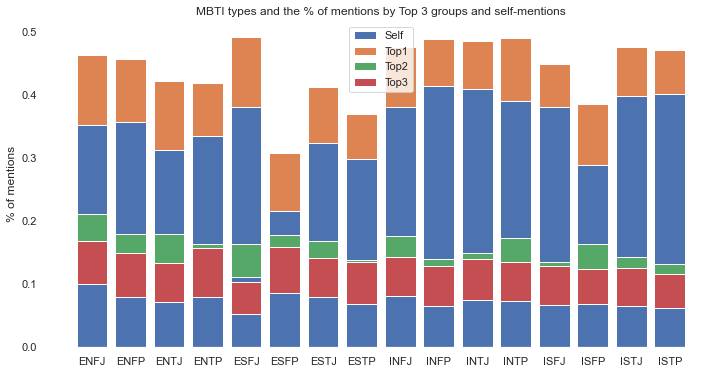

In [320]:
plt.figure(figsize=(12,6))

N = 16
self_type = test['Self']
Top1 = test['Top1']
Top2 = test['Top2']
Top3 = test['Top3']
ind = np.arange(N)    # the x locations for the groups
width = 0.8       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, self_type, width)
p2 = plt.bar(ind, Top1, width, bottom=self_type)
p3 = plt.bar(ind, Top2, width, bottom=Top1)
p4 = plt.bar(ind, Top3, width, bottom=Top2)


plt.ylabel('% of mentions')
plt.title('MBTI types and the % of mentions by Top 3 groups and self-mentions')
plt.xticks(ind, test.index)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Self', 'Top1', 'Top2','Top3'))


plt.show()

### Straight lines Plot

In [142]:
test = df_chord.reset_index()

In [148]:
test = test.melt(id_vars='type', value_vars=test.iloc[:,1:])

In [149]:
test

type variable  value
0    ENFJ     ENFJ   1149
1    ENFP     ENFJ    446
2    ENTJ     ENFJ    159
3    ENTP     ENFJ    292
4    ESFJ     ENFJ     37
..    ...      ...    ...
251  INTP     ISTP    581
252  ISFJ     ISTP    111
253  ISFP     ISTP    225
254  ISTJ     ISTP     89
255  ISTP     ISTP   1607

[256 rows x 3 columns]

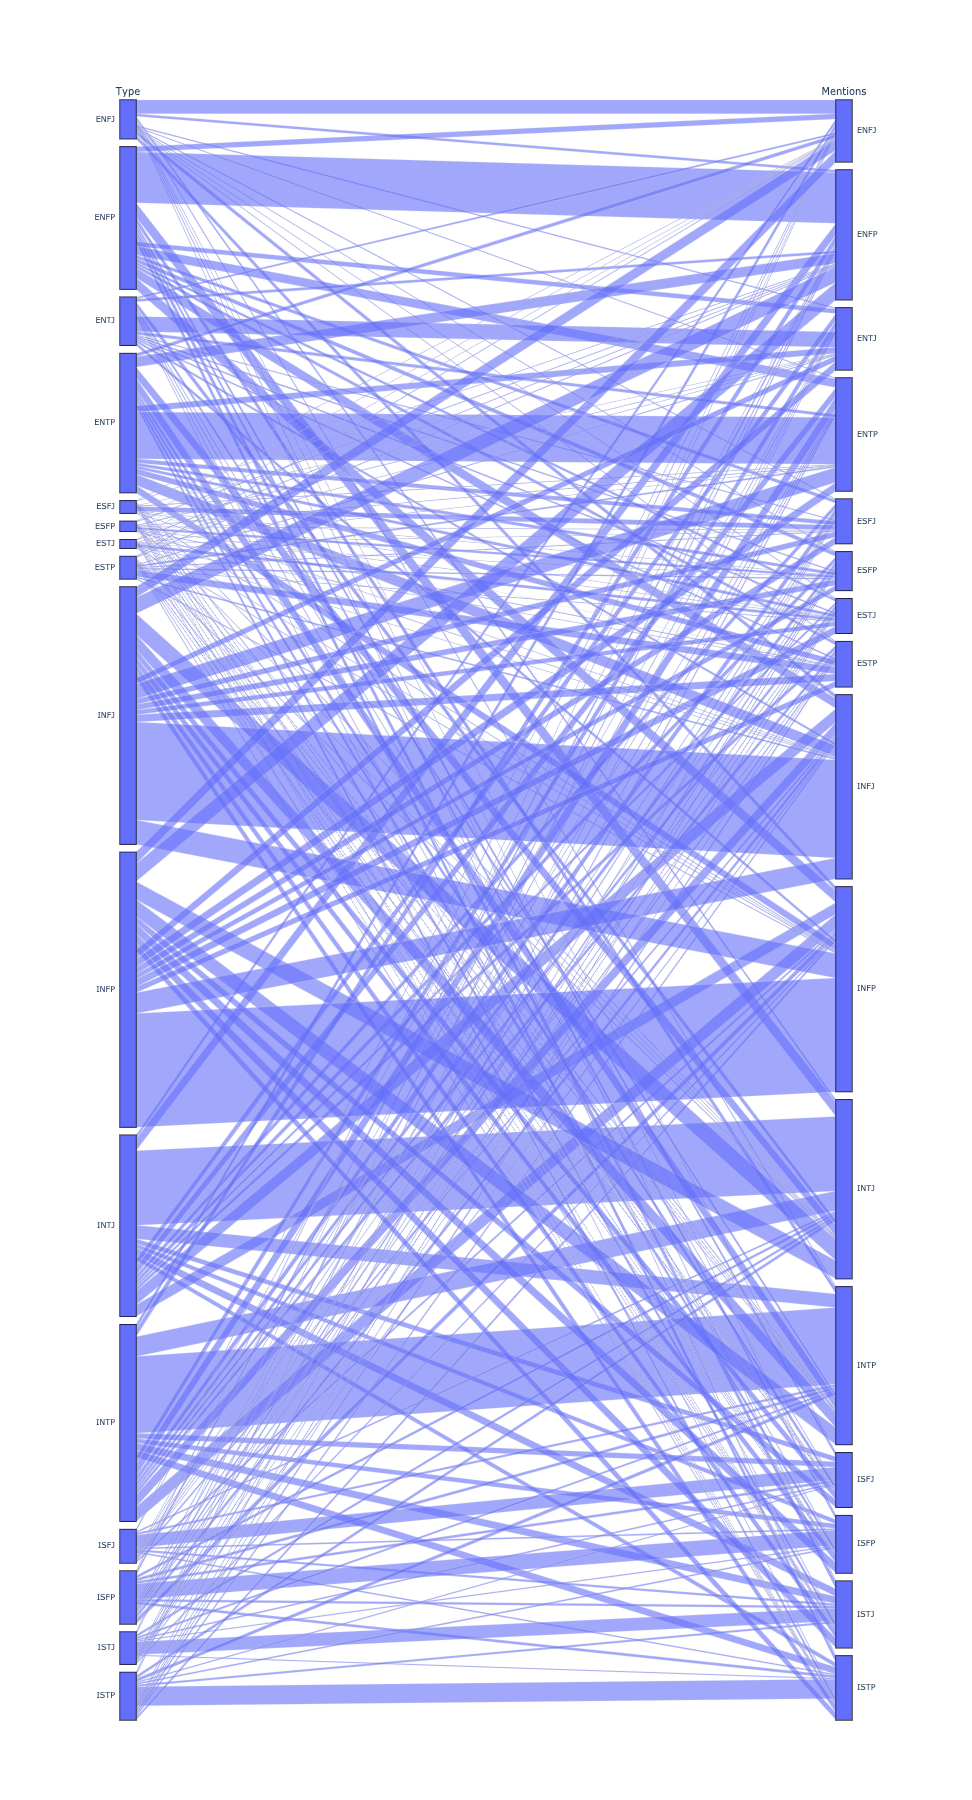

In [167]:
#fig = go.Figure(go.Parcats(dimensions= [
#                           {'label': 'Type','values': test['type']},
#                           {'label': 'Mentions','values':test['variable']}], 
#                           counts=test['value']))

#fig.update_layout(font_size=10, autosize=False, width=1300, height=1800)

#fig.show()

In [105]:
df_percentages
np.fill_diagonal(df_percentages.values,0)

In [106]:
test1 = df_percentages.reset_index()

In [107]:
test1 = pd.melt(test1, id_vars=['type'])

In [108]:
test1['value'] = test1['value'].apply(lambda x:x*100)

In [109]:
colors_types_rgb

{'INFP': (173, 49, 57),
 'INFJ': (198, 77, 67),
 'INTP': (214, 108, 84),
 'INTJ': (226, 140, 100),
 'ENTP': (233, 171, 114),
 'ENFP': (238, 197, 138),
 'ISTP': (242, 221, 163),
 'ISFP': (245, 238, 186),
 'ENTJ': (242, 246, 212),
 'ISTJ': (230, 242, 240),
 'ENFJ': (204, 228, 236),
 'ISFJ': (176, 211, 223),
 'ESTP': (145, 186, 207),
 'ESFP': (118, 158, 190),
 'ESFJ': (92, 128, 172),
 'ESTJ': (74, 97, 154)}

In [110]:
'rgba'+str(colors_types_rgb[mbti_type])[:-1]+alpha

NameError: name 'alpha' is not defined

In [111]:
types = list(df['type'].unique())

In [112]:
'rgba'+str(colors_types_rgb[mbti_type])[:-1]+'0.2)'

'rgba(198, 77, 670.2)'

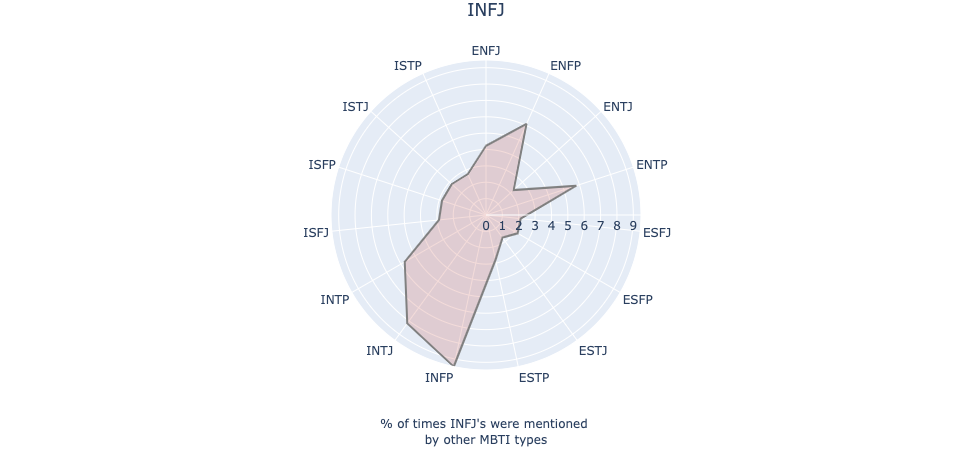

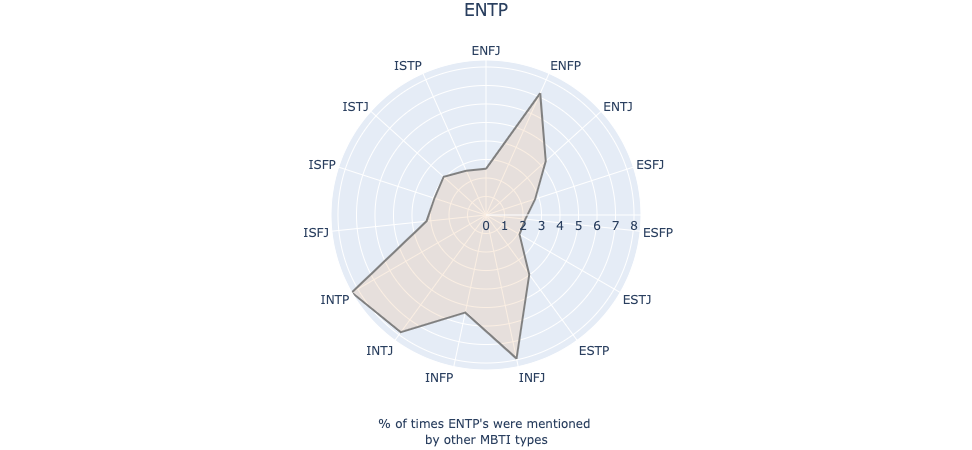

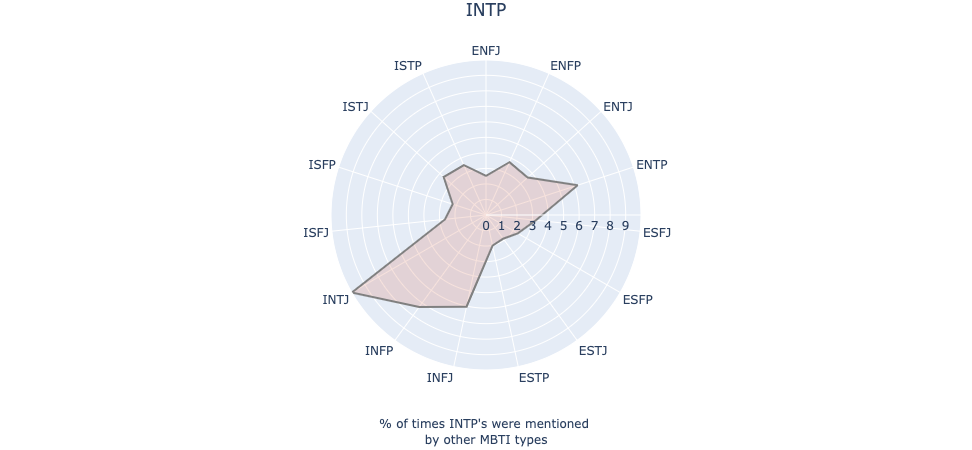

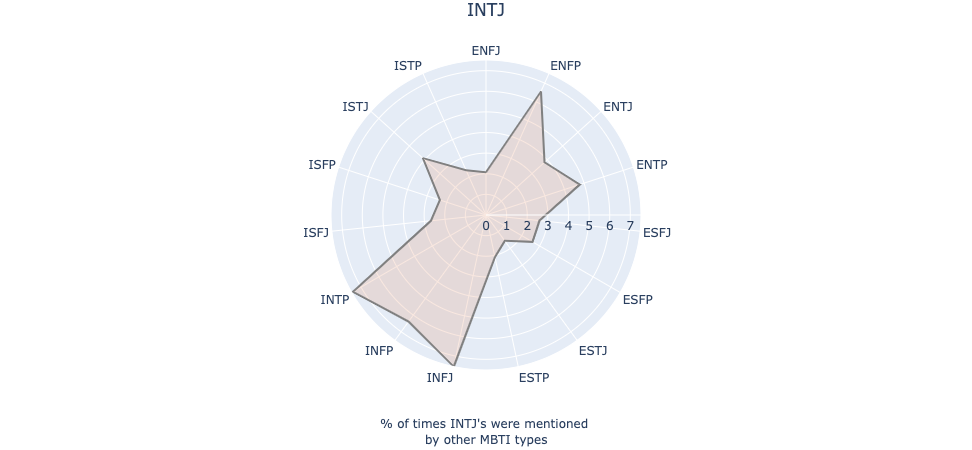

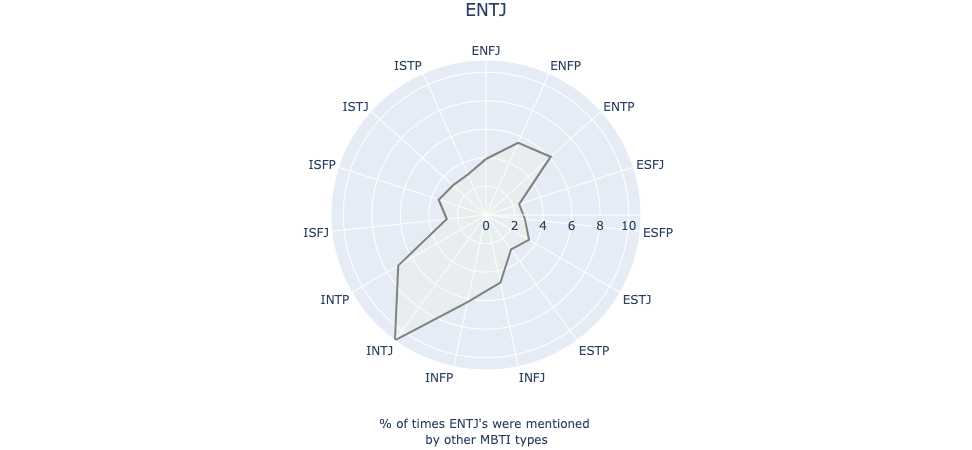

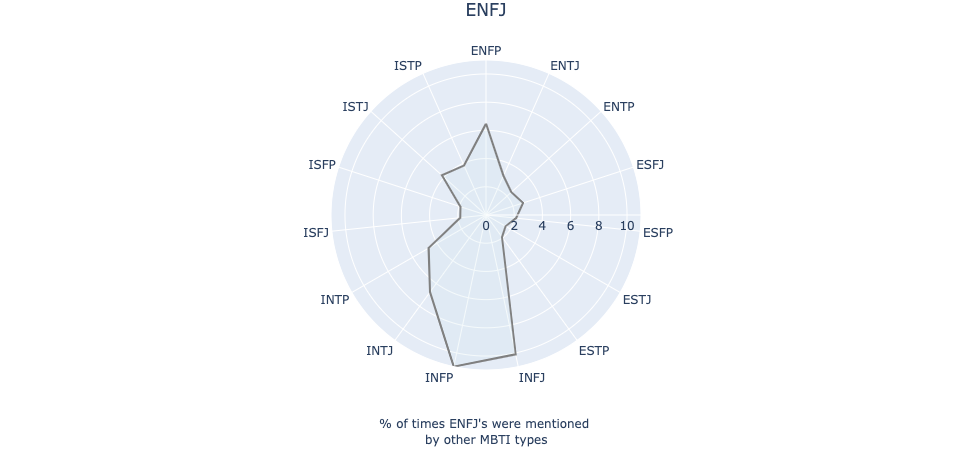

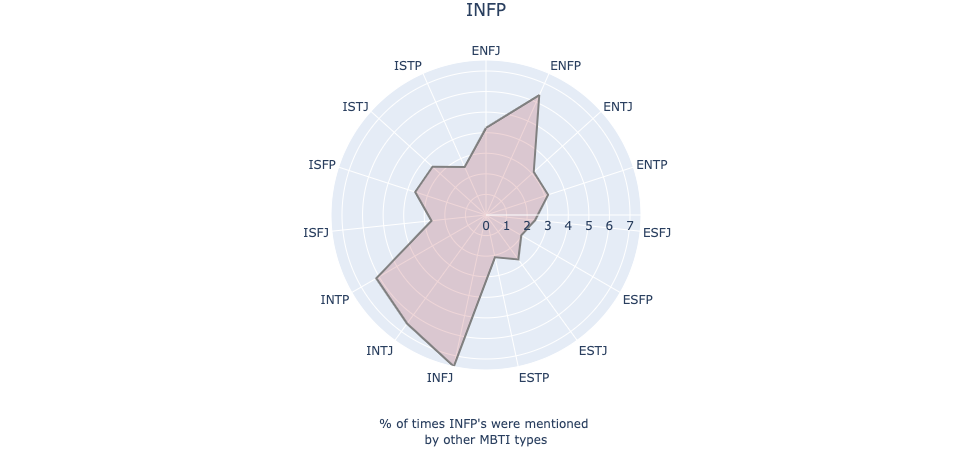

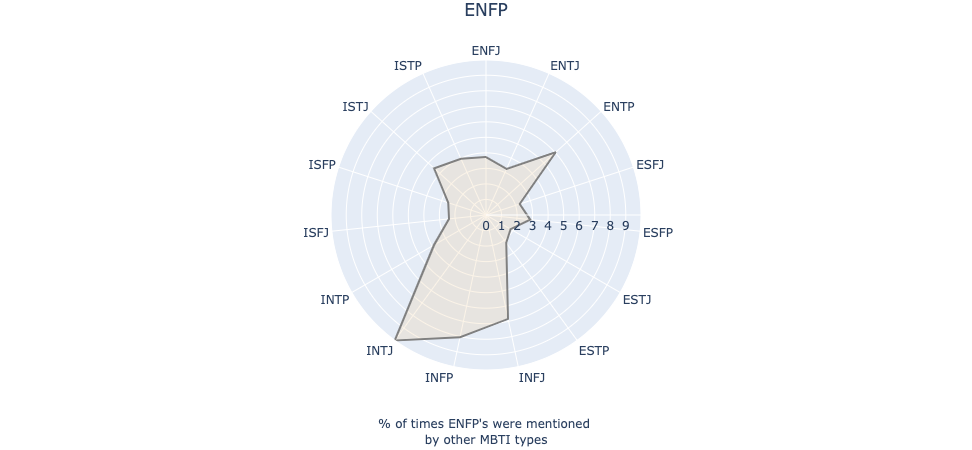

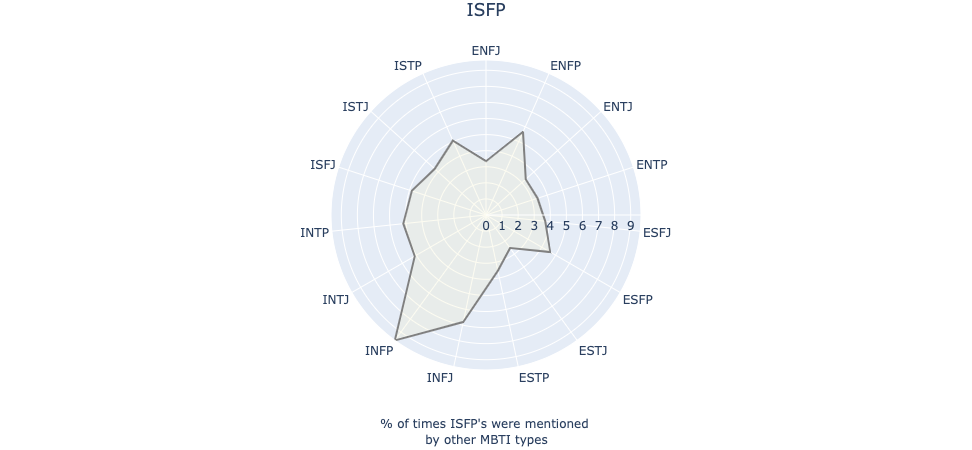

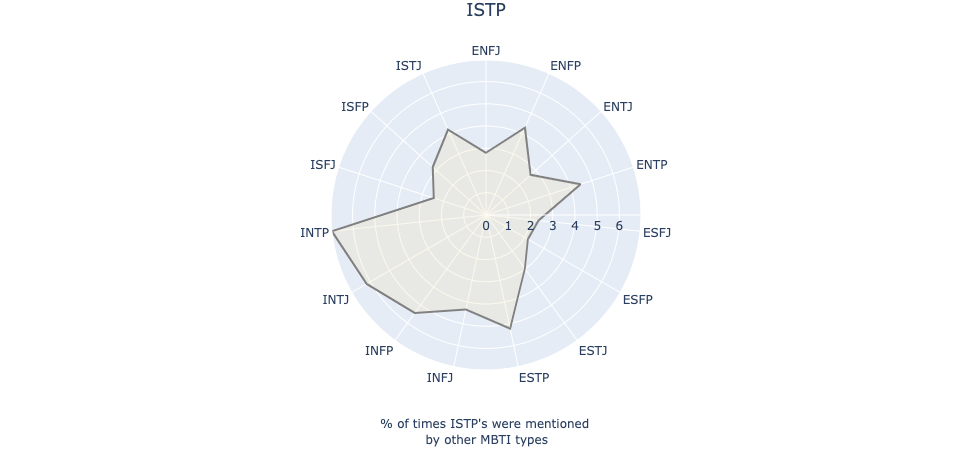

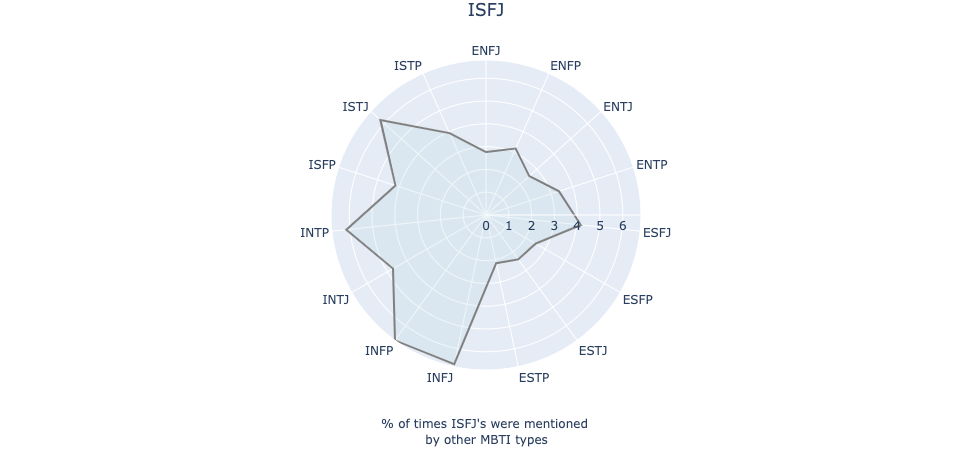

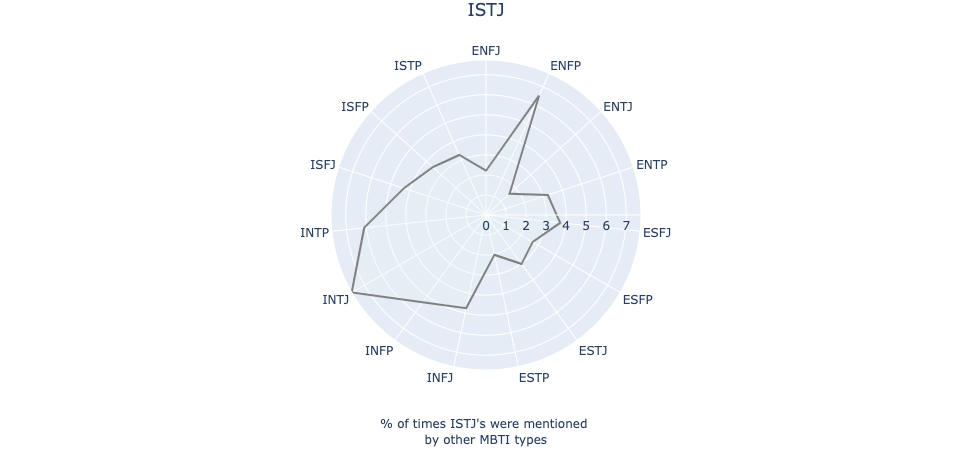

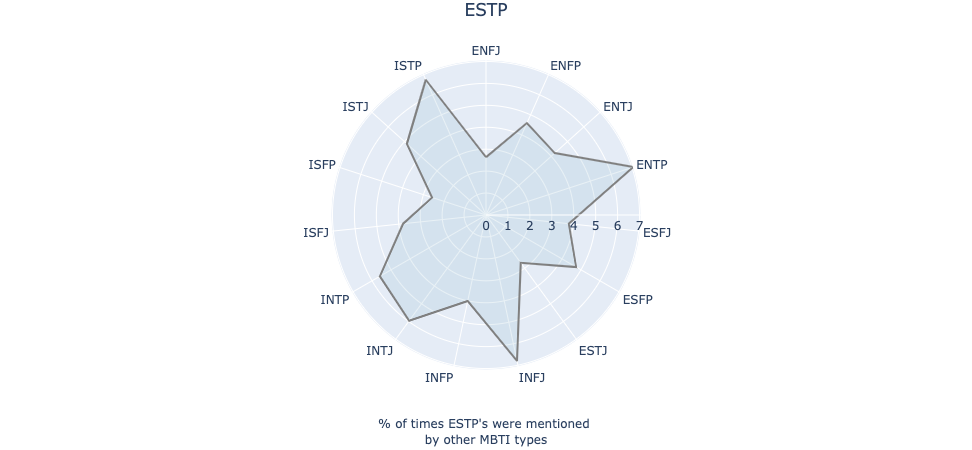

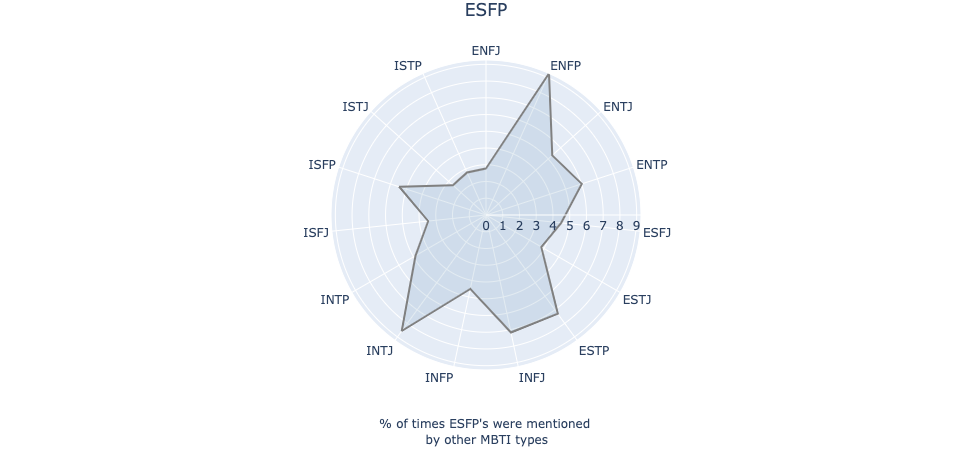

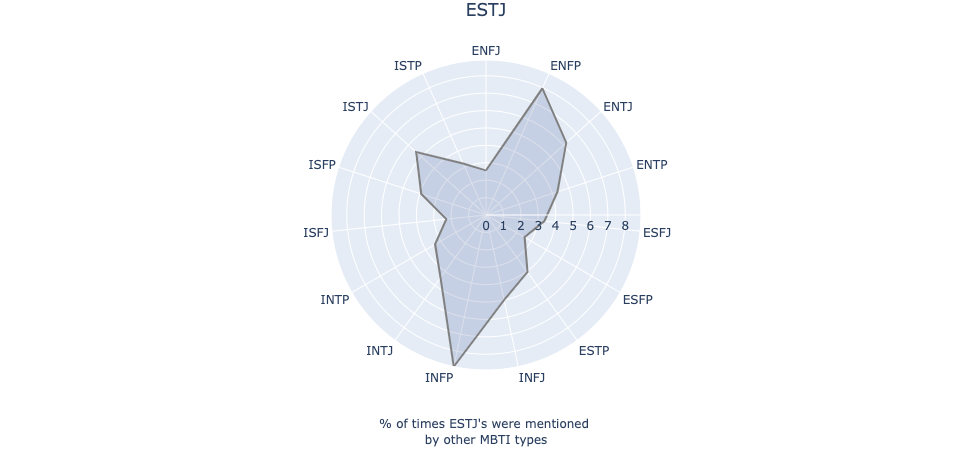

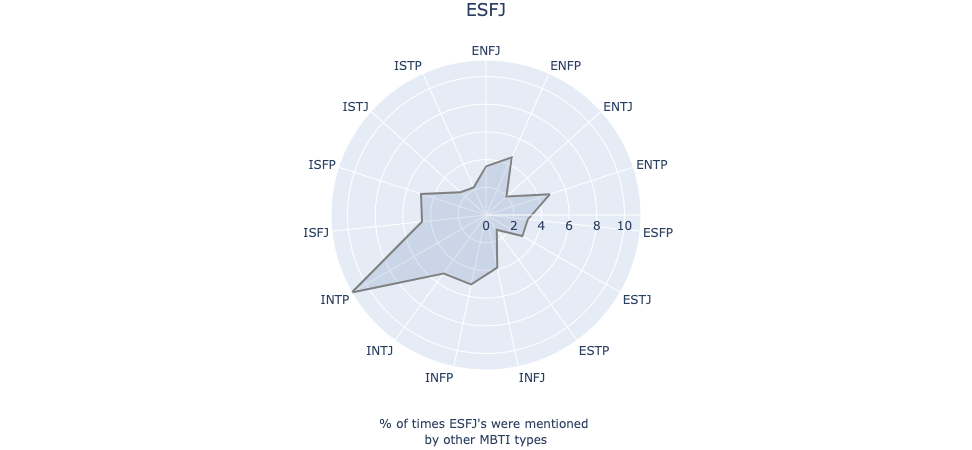

<Figure size 432x288 with 0 Axes>

In [117]:
import plotly.express as px

for mbti in types:
    mbti_type = mbti
    df_mbti = test1[(test1['type'] == mbti_type) & test1['value'] != 0]
    fig = px.line_polar(df_mbti, r='value', theta='variable', line_close=True)


    fig.update_traces(fill='toself', 
                      line=dict(color='grey'),
                      fillcolor=('rgba'+str(colors_types_rgb[mbti_type])[:-1]+', 0.2)'))

    fig.update_layout(title={'text': mbti_type,'y':0.99,'x':0.5,'xanchor': 'center', 'yanchor': 'top'},
                     annotations=[dict(x=0.5, y=-0.25, showarrow=False, text="% of times "+mbti_type+"'s were mentioned <br>by other MBTI types")])


    #plotly.offline.plot(fig, filename='Figures/Plotly_Radar/'+mbti_type+'plot', image='png', auto_open=False, image_width=1280, image_height=800)
    plt.tight_layout()
    fig.write_image('Figures/Plotly_Radar/'+mbti_type+'.png')

    fig.show()

